# MENG 21200 Project - Analyzing Network Models to Understand Localized Effects
### Mohammad Hassan
---

## 1 ~ Creating and Analyzing a Simple Disease Network

### Library Imports

In [102]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import networkx as nx

### Network Class

In [369]:
def create_networks(N=100):
    return {
        "Ring": nx.cycle_graph(N),
        "Lattice": nx.grid_2d_graph(int(np.sqrt(N)), int(np.sqrt(N))),
        "Random": nx.erdos_renyi_graph(N, 0.1),
        "Small World": nx.watts_strogatz_graph(N, 2, 0.5),
        "Scale-Free": nx.barabasi_albert_graph(N, 2),
        "Hexagonal": nx.hexagonal_lattice_graph(int(np.sqrt(N)), int(np.sqrt(N))),
        "Lollipop": nx.lollipop_graph(N, 0),
        "Star": nx.star_graph(N),
        "Turan": nx.turan_graph(N, N // 2),
    }

def pos(G, name):
    if name == "Ring":
        pos = nx.circular_layout(G)
    if name == "Lattice":
        pos = {(x, y) : (y, -x) for x, y in G.nodes()}
    else:
        pos = nx.spring_layout(G, seed=42)
    return pos

### (a) Using the NetworkX python package, create a 2-D lattice graph, a small-world network, and a scale-free network with N = 100 nodes. These networks represent a small group of people with various connections between them. Vizualize each network.

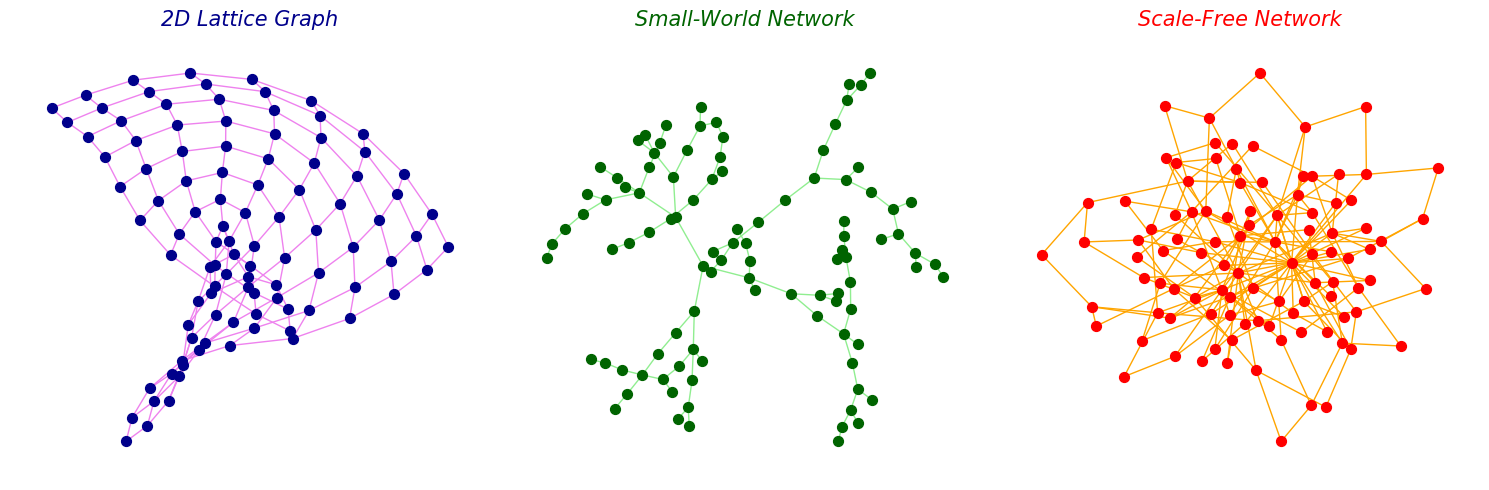

In [104]:
networks = create_networks(100)

lattice = networks["Lattice"]
small_world = networks["Small World"]
scale_free = networks["Scale-Free"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(lattice, ax=ax[0], node_size=50, node_color='darkblue', edge_color='violet')
ax[0].set_title('2D Lattice Graph', fontsize=15, color='darkblue', style='italic')

nx.draw(small_world, ax=ax[1], node_size=50, node_color='darkgreen', edge_color='lightgreen')
ax[1].set_title('Small-World Network', fontsize=15, color='darkgreen', style='italic')

nx.draw(scale_free, ax=ax[2], node_size=50, node_color='red', edge_color='orange')
ax[2].set_title('Scale-Free Network', fontsize=15, color='red', style='italic')

fig.tight_layout()

The following plots are not specified for position, and default to 'spring-layout', later for the contour plots we will specify specific layouts and reproduce the vizualizations for visual clarity.

### (b) Compare each network by calculating and interpreting the degree distrubution (i.e., the distribution of the number of nodes within a certain degree)

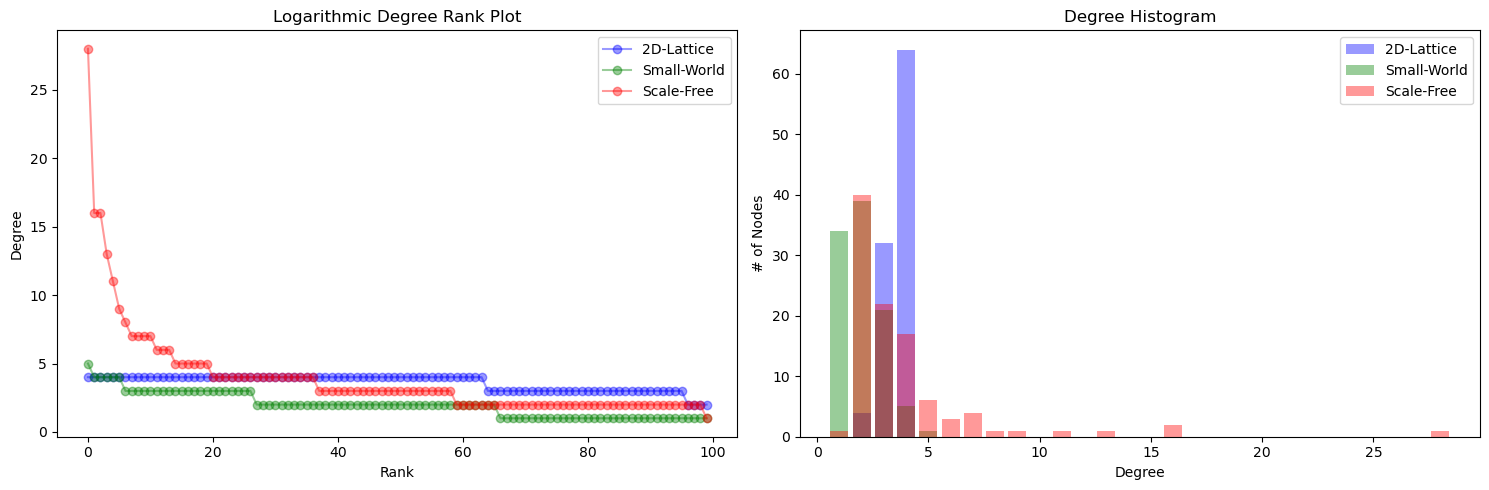

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colors = ['b', 'g', 'r']
degree_sequence_list = []
networks = [lattice, small_world, scale_free]
names = ['2D-Lattice', 'Small-World', 'Scale-Free']

for i, network in enumerate(networks):
    degree_sequence_list.append(sorted((d for n, d in network.degree()), reverse=True))

for i in range(len(degree_sequence_list)):
    ax[1].bar(*np.unique(degree_sequence_list[i], return_counts=True), color=f"{colors[i]}", label=f'{names[i]}', alpha=0.4)
    ax[0].plot(degree_sequence_list[i], f"{colors[i]}-o", label=f'{names[i]}', alpha=0.4)

ax[0].set_title("Logarithmic Degree Rank Plot")
ax[0].set_ylabel("Degree")
ax[0].set_xlabel("Rank")
ax[0].legend()

ax[1].set_title("Degree Histogram")
ax[1].set_xlabel("Degree")
ax[1].set_ylabel("# of Nodes")
ax[1].legend()

fig.tight_layout()

#### **Degree Distribution Analysis**:
---

The following graphs are numerically accurate, but we can make a qualitatively appealing graphical interpretation of the data by curve fitting the Degree v. Rank plot and fitting each histogram to a gaussian function. Although this lacks empirical value, it can help see a general qualitative trend between each type of graph.

In [106]:
x_lin = np.linspace(2, 4, 1000)
x = np.linspace(0, 4, 1000)
x2 = np.linspace(0, 100, 1000)

# INVERSE
def inverse(x, A, k, a):
    return A / (x * k + a)

# SQRT 1
def sqrt(x, A, k, a, b, c):
    return A * np.sqrt(a + k * (x + c)) + b

# GAUSSIAN
def gaussian(x, A, k, a):
    return A * np.exp(-(k * (x - a) ** 2))

data = []
for i in range(len(degree_sequence_list)):
    for j in range(2):
        data.append(np.unique(degree_sequence_list[i], return_counts=True)[j])

lattice_linear = sc.stats.linregress(data[0], data[1])
popt_sw, _ = sc.optimize.curve_fit(gaussian, data[2], data[3], p0=[35, 1, 2])
popt_sf, _ = sc.optimize.curve_fit(gaussian, data[4], data[5], p0=[50, 2, 2])

popt_lattice, _ = sc.optimize.curve_fit(sqrt, np.arange(0, 100, 1), degree_sequence_list[0], p0=[0.6, -0.6, 0.3, 0, -100])
popt_swr, _ = sc.optimize.curve_fit(sqrt, np.arange(0, 100, 1), degree_sequence_list[1], p0=[-1.5, 0.1, 2.9, 5.2, -29])
popt_sfr, _ = sc.optimize.curve_fit(inverse, np.arange(0, 100, 1), degree_sequence_list[2], p0=[28, 0.3, 1])

A1, k1, a1 = popt_sw
A2, k2, a2 = popt_sf
A3, k3, a3, b1, c1 = popt_lattice
A4, k4, a4, b2, c2 = popt_swr
A5, k5, a5 = popt_sfr

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/4288754943.py:11: RuntimeWarning: invalid value encountered in sqrt
  return A * np.sqrt(a + k * (x + c)) + b
/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/4288754943.py:27: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_swr, _ = sc.optimize.curve_fit(sqrt, np.arange(0, 100, 1), degree_sequence_list[1], p0=[-1.5, 0.1, 2.9, 5.2, -29])


/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/4288754943.py:11: RuntimeWarning: invalid value encountered in sqrt
  return A * np.sqrt(a + k * (x + c)) + b


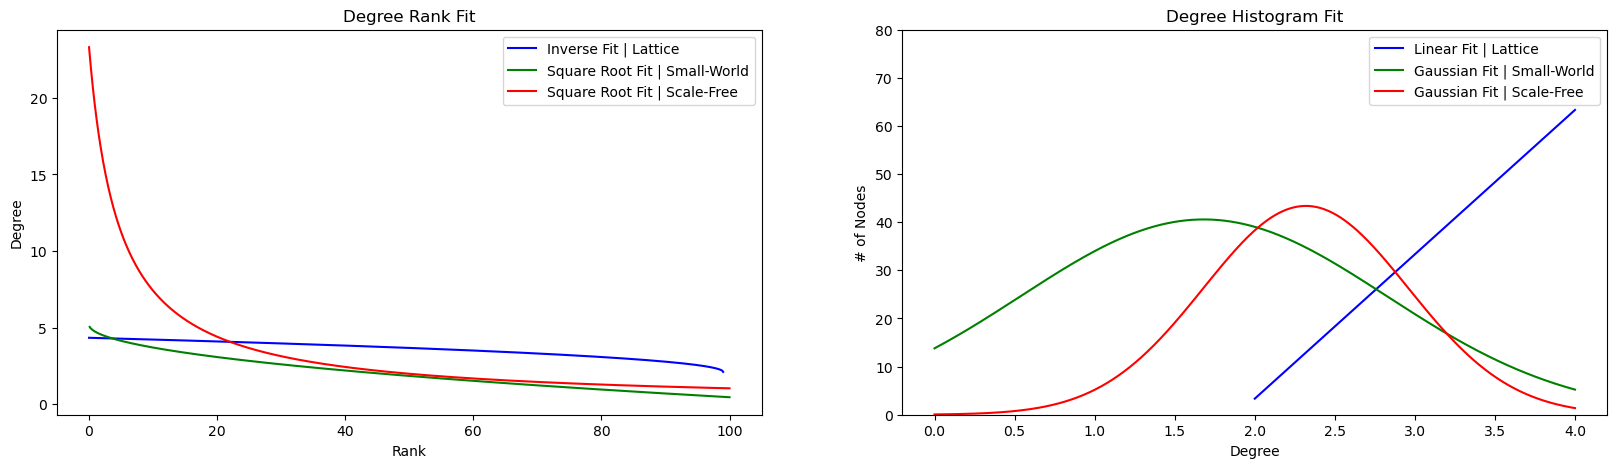

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].set_title("Degree Rank Fit")
ax[0].set_ylabel("Degree")
ax[0].set_xlabel("Rank")
ax[0].plot(x2, sqrt(x2, A3, k3, a3, b1, c1), color='blue', label='Inverse Fit | Lattice')
ax[0].plot(x2, sqrt(x2, A4, k4, a4, b2, c2), color='green', label='Square Root Fit | Small-World')
ax[0].plot(x2, inverse(x2, A5, k5, a5), color='red', label='Square Root Fit | Scale-Free')

ax[1].set_title("Degree Histogram Fit")
ax[1].set_xlabel("Degree")
ax[1].set_ylabel("# of Nodes")
ax[1].set_ylim(0, 80)

ax[1].plot(x_lin, lattice_linear.slope * x_lin + lattice_linear.intercept, color='blue', label='Linear Fit | Lattice')
ax[1].plot(x, gaussian(x, A1, k1, a1), color='green', label='Gaussian Fit | Small-World')
ax[1].plot(x, gaussian(x, A2, k2, a2), color='red', label='Gaussian Fit | Scale-Free')

ax[0].legend()
ax[1].legend()

#### ***Curve Fit Analysis***:
---

**Degree Rank Fit**:
The Scale-Free network has a small amount of nodes with a very high degree however the majority of nodes are able to remain at a degree between 2 and 3. This aligns with the histogram fit with a large peak and small standard deviation however visible outliers that are significant. Furthermore the small-world lacks extreme outliers but can maintain a degree between 0 and 4 for all but 2 nodes. The lattice curve fit aligns with the majority of 4 nodal connections as the maximum and most popular degree of a lattice fit is 4 due to its structure.

**Degree Histogram Fit**:
The following data serves to justify our intuition as only a small amount of nodes with have a very high or very low degree. This aligns with the distribution curve of the small-world and scale-free graphs, while it is also justifiable to see why the degree curve for the lattice is linear as a majority of nodes are made to have 4 neighbors. The scale free has a smaller standard deviation, which aligns with the visual of the network showing that the majority of nodes share the same number of neighbors / degree. The small-world network is unique with a concentrated hub however there are trails of networks with a high and low degrees.

### (c) The disease progresses with the rates $\beta = 0.8\ \text{days}^{−1}$, $\sigma = 0.3\ \text{days}^{-1}$, and $\gamma = 0.3\ \text{days}^{-1}$. Assign an initial state [S, E, I, R] to each node in the networks that you have created, where every node is susceptible except for 10 randomly selected nodes (10% of the 100 nodes in each network) that begin as exposed. Solve the system of ODEs over time. Visualize the spread of the disease through your population by plotting the total numbers of S, E, I, and R for the population as a function of time.

#### The system of differential equations that define our network's behavior
---

For each node, $i$, the states evolve as:
$$
\\[0.1in]
\dfrac{\mathrm{d}S_{i}}{\mathrm{d}t} = -\beta S_{i}P_{I,i} \Rightarrow \text{Susceptibile probability's change in time is negative the product of infection rate, infection pressure, and susceptible probability.}
\\[0.1in]
\dfrac{\mathrm{d}E_{i}}{\mathrm{d}t} = \beta S_{i}P_{I,i} - \sigma E_{i} \Rightarrow \text{Exposure probability's change in time is negative susceptibility rate of change minus the product of exposure to infected rate and exposure probability.}
\\[0.1in]
\dfrac{\mathrm{d}I_{i}}{\mathrm{d}t} = \sigma E_{i} - \gamma I_{i} \Rightarrow \text{Infected probability's change in time is the product of exposure to infected rate and exposure probability minus the product of recovery rate and infected probability.}
\\[0.1in]
\dfrac{\mathrm{d}R_{i}}{\mathrm{d}t} = \gamma I_{i} \Rightarrow \text{The rate at which recovery probability changes over time is the product of recovery rate and infected probability.}
$$

Where $\beta$ is the infection rate, $\sigma$ is the rate at which exposed individuals become infectious, $\gamma$ is the recovery rate, and $N$ is the total population size. $P_{I,i}$ is the infection pressure, or average “infectiousness” of the node $i$’s neighbors. 

$$
\text{Infection Pressure:}\ P_{I,i} = \frac{\Sigma_{j \in \text{neighbors}(i)}I_{j}}{k_{i}} \Rightarrow \text{Simply the average infection probability of a node's neighbors}
$$

Given the system of differential equations, and a network of nodes we can use to simulate the system - we need to set a 'state' to each node ($i$) that describes the following $X_{i}$ values, 
where $X$ ranges from $S$, $E$, $I$, and $R$.

##### Setting Susceptible & Exposed States

In [ ]:
# SETTING SUSCEPTIBLE STATES

for graph in networks:
    for node in graph.nodes():
        graph.nodes[node]['state'] = {'S': 1.0, 'E': 0.0, 'I': 0.0, 'R': 0.0}

# SETTING RANDOMIZED EXPOSED STATES

exposed_nodes = np.random.choice(len(lattice.nodes()), 10, replace=False)

for graph in networks:
    for i in exposed_nodes:
        graph.nodes[list(graph.nodes())[i]]['state'] = {'S': 0.0, 'E': 1.0, 'I': 0.0, 'R': 0.0}

##### ODE Model Function

In [ ]:
def model(t, y, network, beta, sigma, gamma):

    dydt = np.zeros_like(y)
    nodes = list(network.nodes())

    for i, node in enumerate(nodes):

        idx = i * 4

        S = y[idx]
        E = y[idx + 1]
        I = y[idx + 2]
        R = y[idx + 3]

        infected_neighbors = []
        neighbors = list(network.neighbors(node))

        if neighbors:
            for neighbor in neighbors:
                n = nodes.index(neighbor) * 4 + 2
                infected_neighbors.append(y[n])
            P = sum(infected_neighbors) / len(infected_neighbors)
        else:
            P = 0

        dSdt = -beta * S * P
        dEdt = beta * S * P - sigma * E
        dIdt = sigma * E - gamma * I
        dRdt = gamma * I

        dydt[i * 4] = dSdt
        dydt[i * 4 + 1] = dEdt
        dydt[i * 4 + 2] = dIdt
        dydt[i * 4 + 3] = dRdt

    return dydt

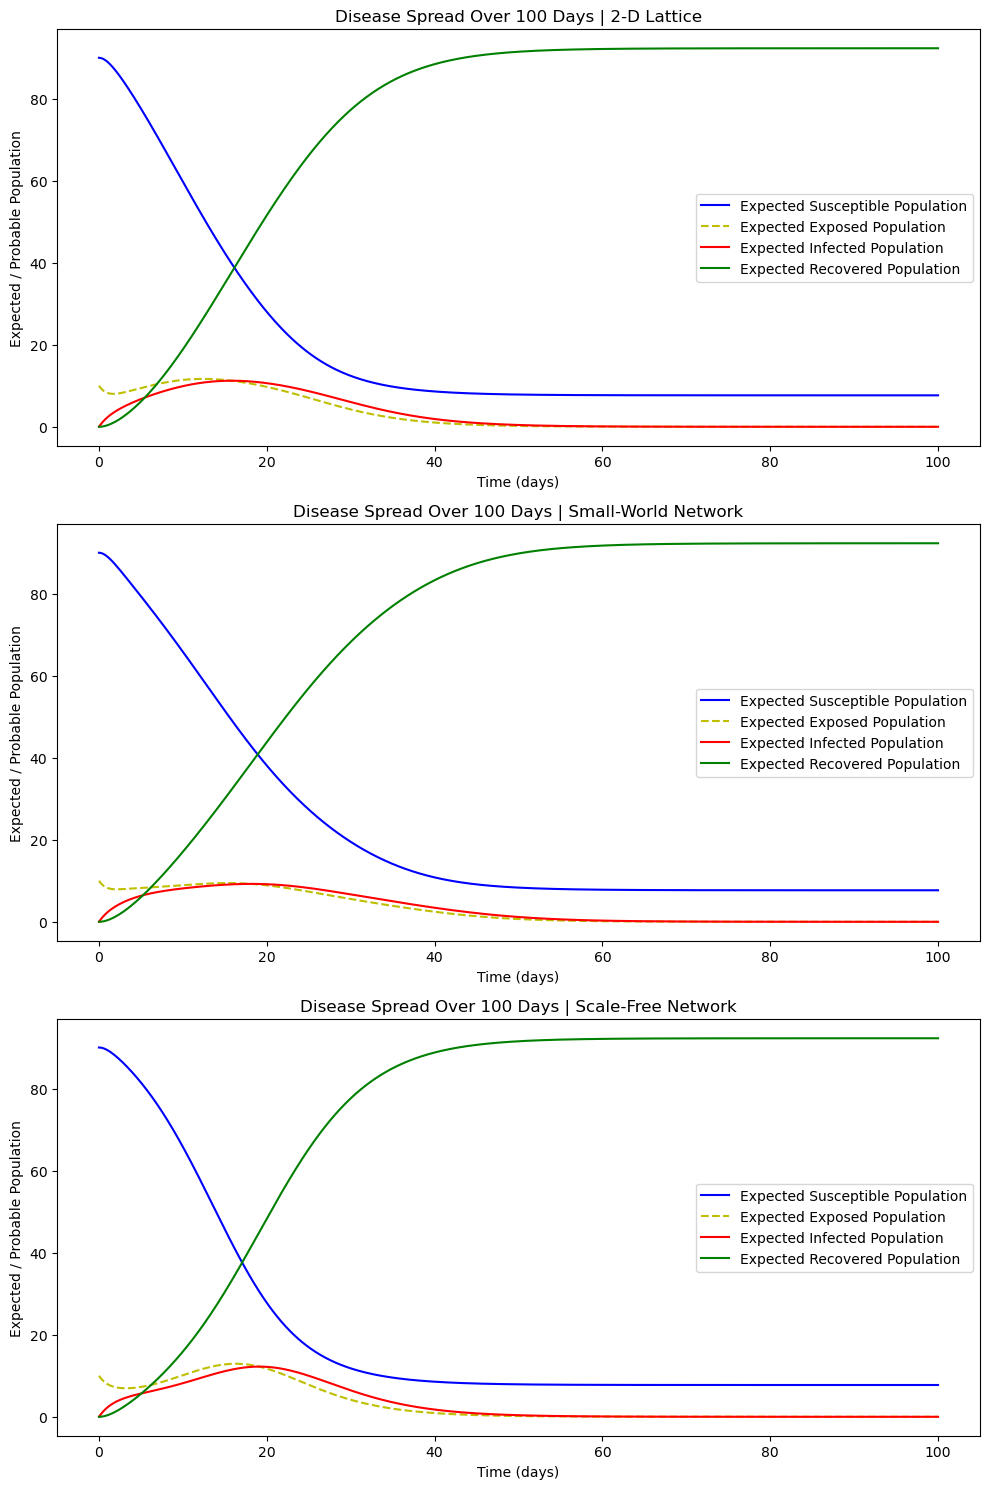

In [ ]:
t = np.linspace(0, 100, 1000)
beta = 0.8
sigma = 0.3
gamma = 0.3
solution_name = ['2-D Lattice', 'Small-World Network', 'Scale-Free Network']

y0_lattice = [lattice.nodes[node]['state'].get(state) for node in lattice for state in ['S', 'E', 'I', 'R']]
y0_small_world = [lattice.nodes[node]['state'].get(state) for node in lattice for state in ['S', 'E', 'I', 'R']]
y0_scale_free = [lattice.nodes[node]['state'].get(state) for node in lattice for state in ['S', 'E', 'I', 'R']]


solution_lattice = sc.integrate.odeint(model, y0_lattice, t, args=(lattice, beta, sigma, gamma), tfirst=True)
solution_sw = sc.integrate.odeint(model, y0_small_world, t, args=(small_world, beta, sigma, gamma), tfirst=True)
solution_sf = sc.integrate.odeint(model, y0_scale_free, t, args=(scale_free, beta, sigma, gamma), tfirst=True)

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

for i, solution in enumerate([solution_lattice, solution_sw, solution_sf]):
    susceptible_sum = np.sum(solution[:, 0::4], axis=1)
    exposed_sum = np.sum(solution[:, 1::4], axis=1)
    infected_sum = np.sum(solution[:, 2::4], axis=1)
    recovered_sum = np.sum(solution[:, 3::4], axis=1)
    ax[i].plot(t, susceptible_sum, '-b', label='Expected Susceptible Population')
    ax[i].plot(t, exposed_sum, '--y', label='Expected Exposed Population')
    ax[i].plot(t, infected_sum, '-r', label='Expected Infected Population')
    ax[i].plot(t, recovered_sum, 'g', label='Expected Recovered Population')
    ax[i].set_title(f'Disease Spread Over 100 Days | {solution_name[i]}')
    ax[i].set_ylabel('Expected / Probable Population')
    ax[i].set_xlabel('Time (days)')
    ax[i].legend()

fig.tight_layout()

#### **ODE Solution Analysis**:
---

The following solutions to the different nodal networks are quite similar and all have the equilibrium of extremely low infected and exposed expected populations and an overwhelming majority of recovered populations while a low minory remains susceptible (were not exposed to the spread of the disease). Following numbers are below (ex: Scale-Free)

In [455]:
print(f"Expected Susceptible Population: {susceptible_sum[-1]}")
print(f"Expected Exposed Population: {exposed_sum[-1]}")
print(f"Expected Infected Population: {infected_sum[-1]}")
print(f"Expected Recovered Population: {recovered_sum[-1]}")

Expected Susceptible Population: 7.747246761970219
Expected Exposed Population: 6.31278980805512e-05
Expected Infected Population: 0.00013496065257877742
Expected Recovered Population: 92.25255514947911


### (d) Plot the time-dependent behavior of individual nodes in the system, presenting the behavior of 5 to 10 distinct nodes. Compare and discuss your observations of the behavior of the individual nodes to that of the overall population

Given that there are 100 individuals in the population, we will select 9 random numbers within the rank number of the network and plot the time-dependent behavior of each node corresponding to the selected rank. While in part $(c)$, we were able to make an expectation value of our S,E,I,R populations, it must be noted that when tracking the behavior of a single node we are limited to only measuring the probability of a node's state.

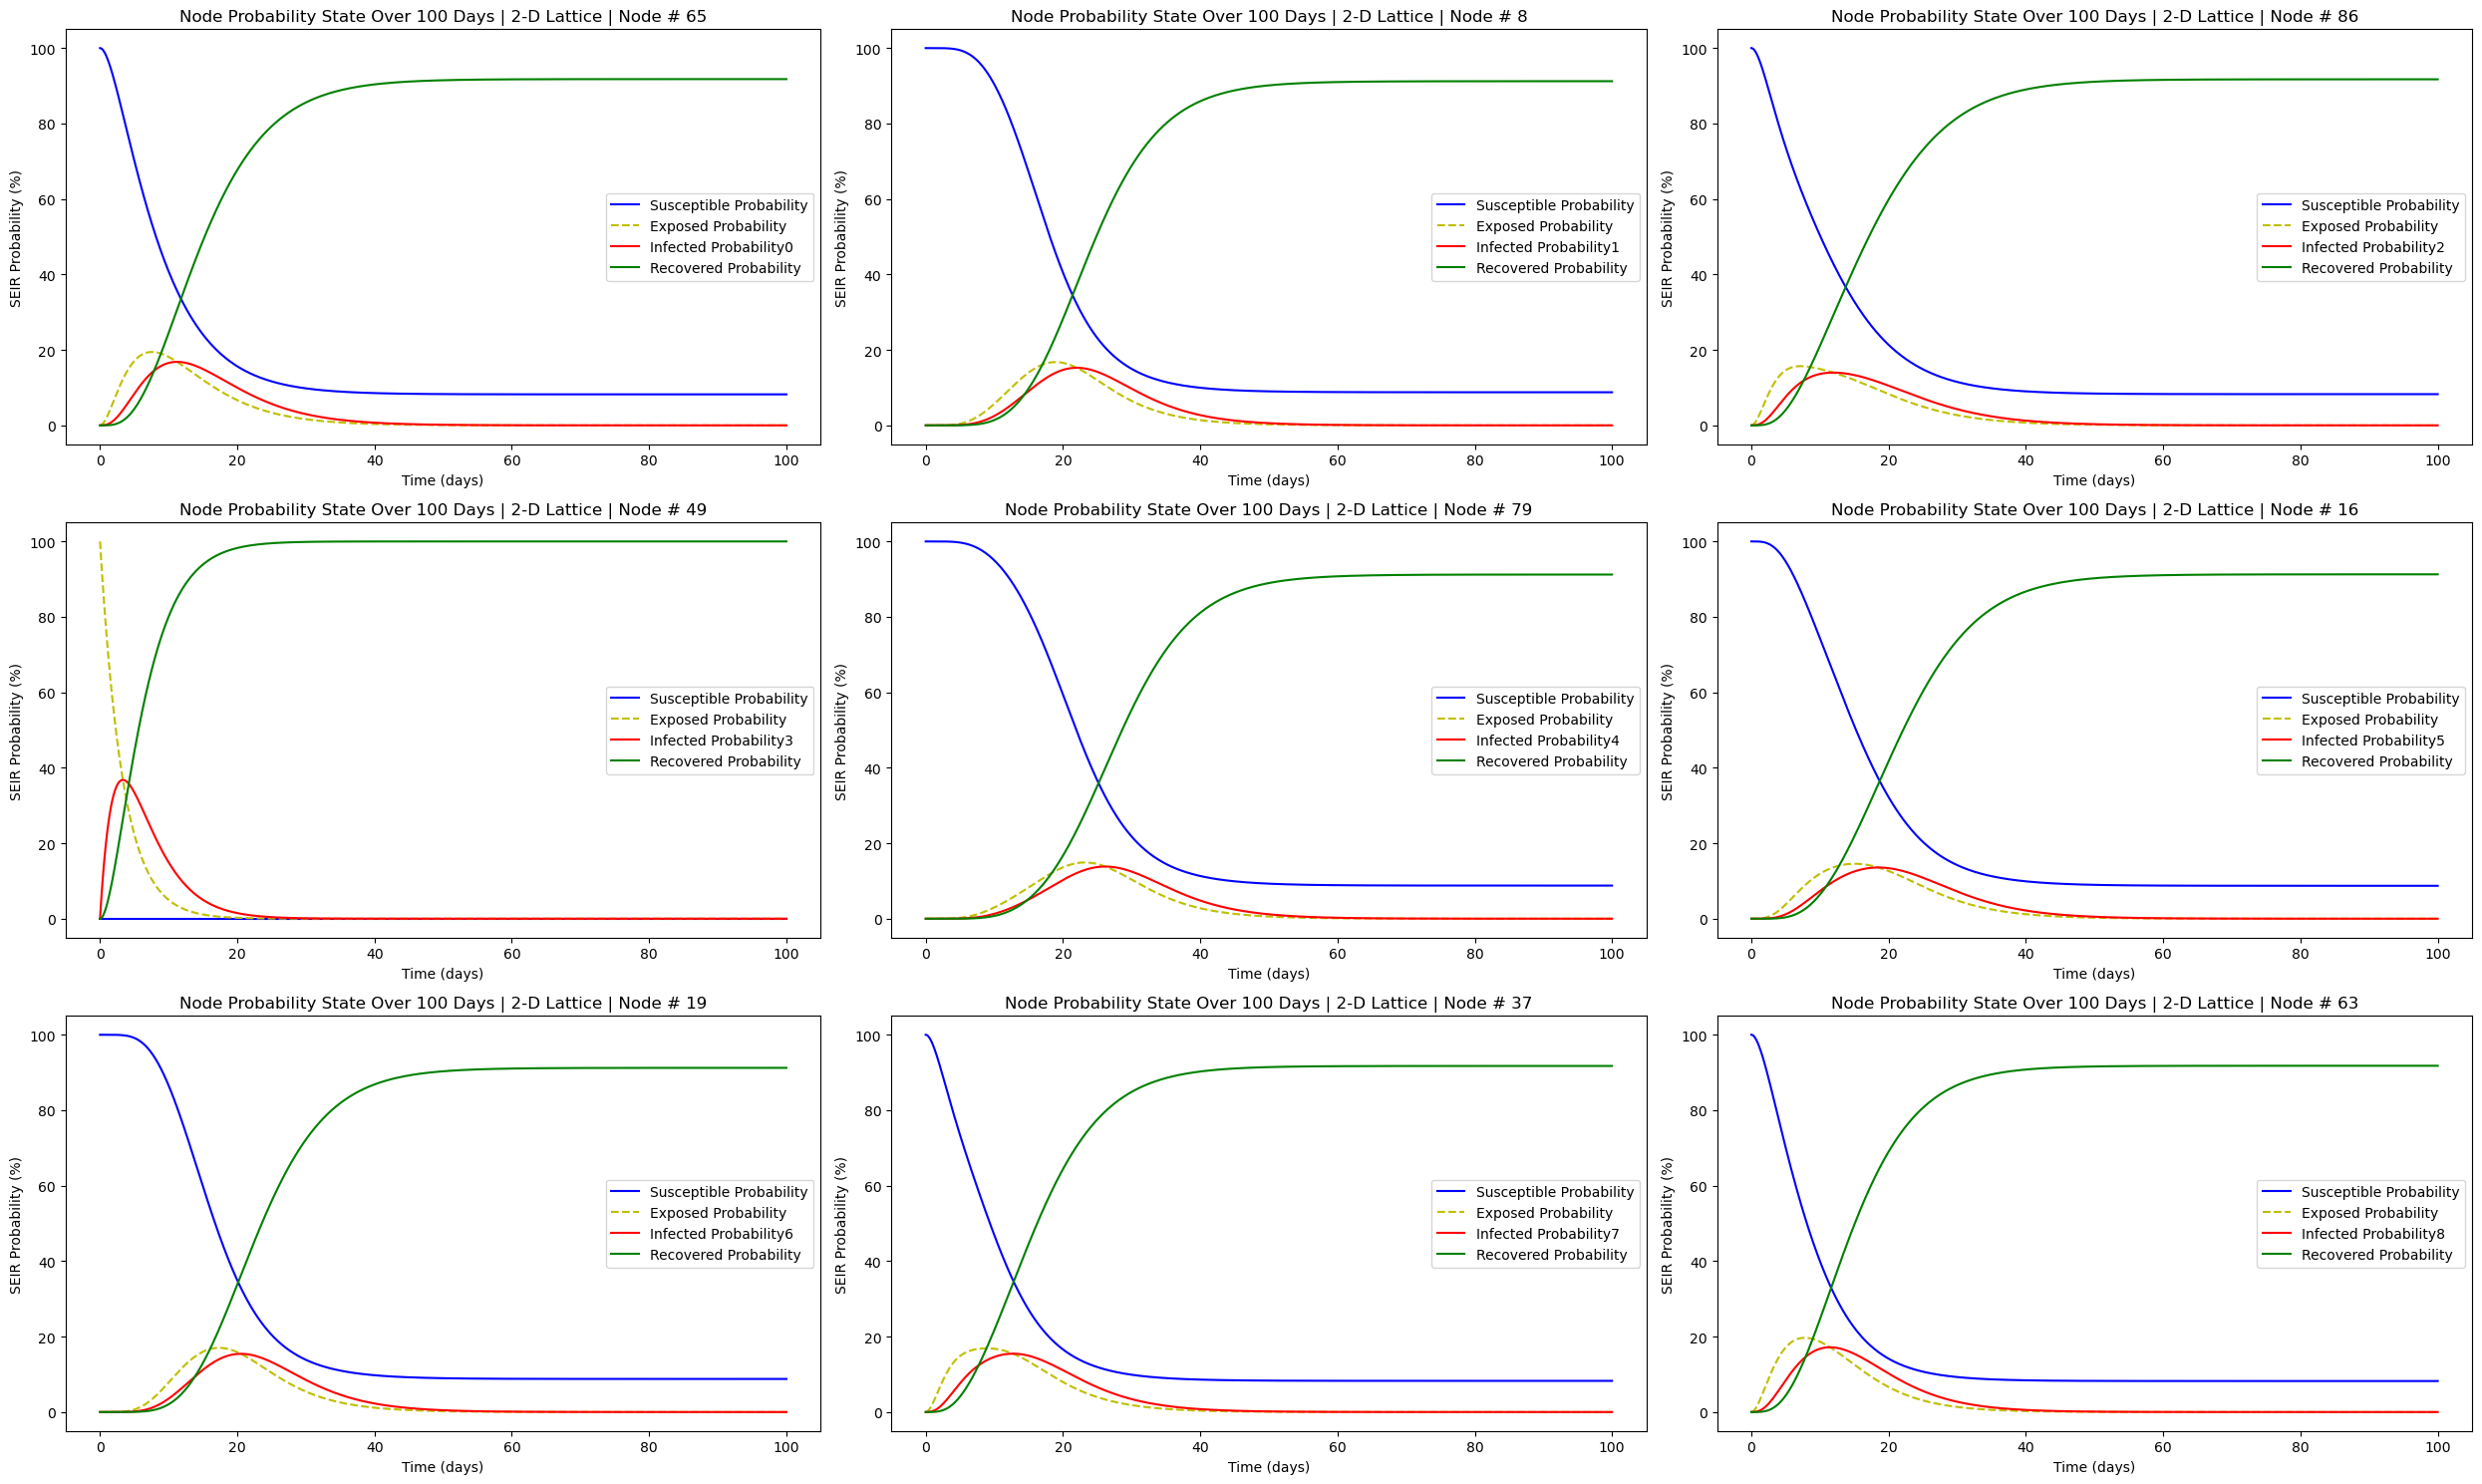

In [120]:
labrat_nodes = np.random.choice(len(lattice.nodes()), 9, replace=False)

solution_lab_list = []
for solution in [solution_lattice, solution_sw, solution_sf]:
    for node_num in labrat_nodes:
        data = {'S': solution[:, 4 * node_num],'E': solution[:, 4 * node_num + 1], 'I': solution[:, 4 * node_num + 2], 'R': solution[:, 4 * node_num + 3]}
        solution_lab_list.append(data)

fig, ax = plt.subplots(3, 3, figsize=(25,15))

ax = ax.flatten()

for i in range(len(ax)):
    ax[i].plot(t, solution_lab_list[i]['S'] * 100, '-b', label='Susceptible Probability')
    ax[i].plot(t, solution_lab_list[i]['E'] * 100, '--y', label='Exposed Probability')
    ax[i].plot(t, solution_lab_list[i]['I'] * 100, '-r', label=f'Infected Probability{i}')
    ax[i].plot(t, solution_lab_list[i]['R'] * 100, 'g', label='Recovered Probability')
    ax[i].set_title(f'Node Probability State Over 100 Days | {solution_name[i // 9]} | Node # {labrat_nodes[i]}')
    ax[i].set_ylabel('SEIR Probability (%)')
    ax[i].set_xlabel('Time (days)')
    ax[i].legend()

fig.tight_layout()

#### **Individual ODE Solution Analysis**:
---

We can acknowledge that the solutions are extremely similar to the summed solution, whie there are some nodes who begin as exposed (our randomly 10 selected nodes).

### (e) For the lattice network, create several contour plots at various time steps to visualize the propagation of disease spatially through the network.

Consider the following positions of all nodes for the countour plot

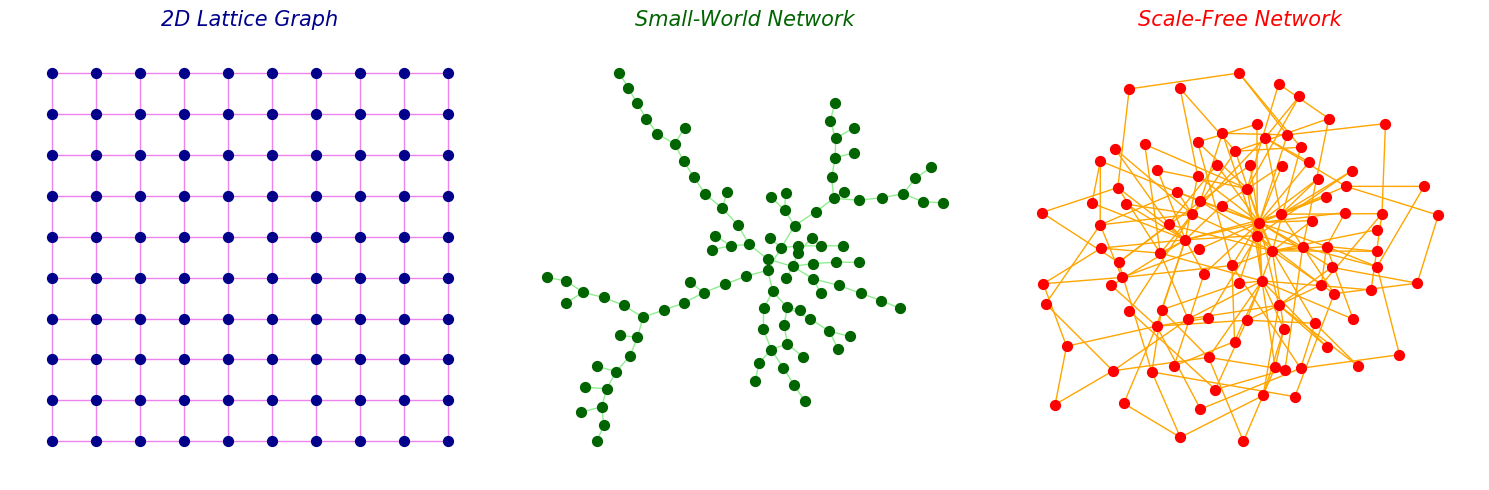

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(lattice, ax=ax[0], pos=pos(lattice, 'Lattice'), node_size=50, node_color='darkblue', edge_color='violet')
ax[0].set_title('2D Lattice Graph', fontsize=15, color='darkblue', style='italic')

nx.draw(small_world, ax=ax[1], pos=nx.kamada_kawai_layout(small_world), node_size=50, node_color='darkgreen', edge_color='lightgreen')
ax[1].set_title('Small-World Network', fontsize=15, color='darkgreen', style='italic')

nx.draw(scale_free, ax=ax[2], pos=nx.kamada_kawai_layout(scale_free), node_size=50, node_color='red', edge_color='orange')
ax[2].set_title('Scale-Free Network', fontsize=15, color='red', style='italic')

fig.tight_layout()

The following function takes in a network, the position layout, and the solution vectors that describe the change in S, E, I, and R probabilities and creates a contour plot.

In [311]:
def spread_visualization(network, pos, solution, color, title, scale, time_indices):
    nodes = list(network.nodes())

    solution_list = []
    for node_num in range(len(nodes)):
        data = {
            'S': solution[:, 4 * node_num],
            'E': solution[:, 4 * node_num + 1],
            'I': solution[:, 4 * node_num + 2],
            'R': solution[:, 4 * node_num + 3]
        }
        solution_list.append(data)

    time_indices = [time * 10 for time in time_indices]
    time_days = [t[idx] for idx in time_indices]

    fig, axes = plt.subplots(1, len(time_indices), figsize=(20, 4), dpi=120)
    fig.suptitle('Spatial Propogation of Disease through Time', y=1.00, fontsize=14)

    for i, t_idx in enumerate(time_indices):
        x_coords = [pos[node][0] for node in nodes]
        y_coords = [pos[node][1] for node in nodes]

        disease_states = []
        for node_idx in range(len(nodes)):
            S = solution_list[node_idx]['S'][t_idx]
            E = solution_list[node_idx]['E'][t_idx]
            I = solution_list[node_idx]['I'][t_idx]
            R = solution_list[node_idx]['R'][t_idx]

            state_value = 0 * S + 2.5 * E + 3.5 * I + 4.5 * R
            disease_states.append(state_value)

        xi = np.linspace(min(x_coords), max(x_coords), 1000)
        yi = np.linspace(min(y_coords), max(y_coords), 1000)
        X, Y = np.meshgrid(xi, yi)

        Z = sc.interpolate.griddata((x_coords, y_coords), disease_states, (X, Y), method='cubic')

        ax = axes[i]
        contour = ax.contourf(X, Y, Z, levels=500, cmap=color, vmin=0, vmax=5)

        nx.draw_networkx_edges(network, pos, ax=ax, alpha=0.2, width=0.5)

        nx.draw_networkx_nodes(network, pos, ax=ax, node_color=disease_states, cmap=color, vmin=0, vmax=5, node_size=30)

        ax.set_title(f'Day {t[t_idx]:.1f} | {title}')
        ax.set_xticks([])
        ax.set_yticks([])

    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=0, vmax=5))
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Disease State')
    cbar.set_ticks([scale[0], scale[1], scale[2], scale[3]])
    cbar.set_ticklabels(['0 - S', '2.5 - I', '3.5 - E', '4.5 - R'])

    plt.tight_layout(rect=[0, 0, 0.9, 1])

    return fig, axes

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/1169500941.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 2400x480 with 6 Axes>,
 array([<Axes: title={'center': 'Day 0.0 | 2D - Lattice'}>,
        <Axes: title={'center': 'Day 5.0 | 2D - Lattice'}>,
        <Axes: title={'center': 'Day 15.0 | 2D - Lattice'}>,
        <Axes: title={'center': 'Day 25.0 | 2D - Lattice'}>,
        <Axes: title={'center': 'Day 35.0 | 2D - Lattice'}>], dtype=object))

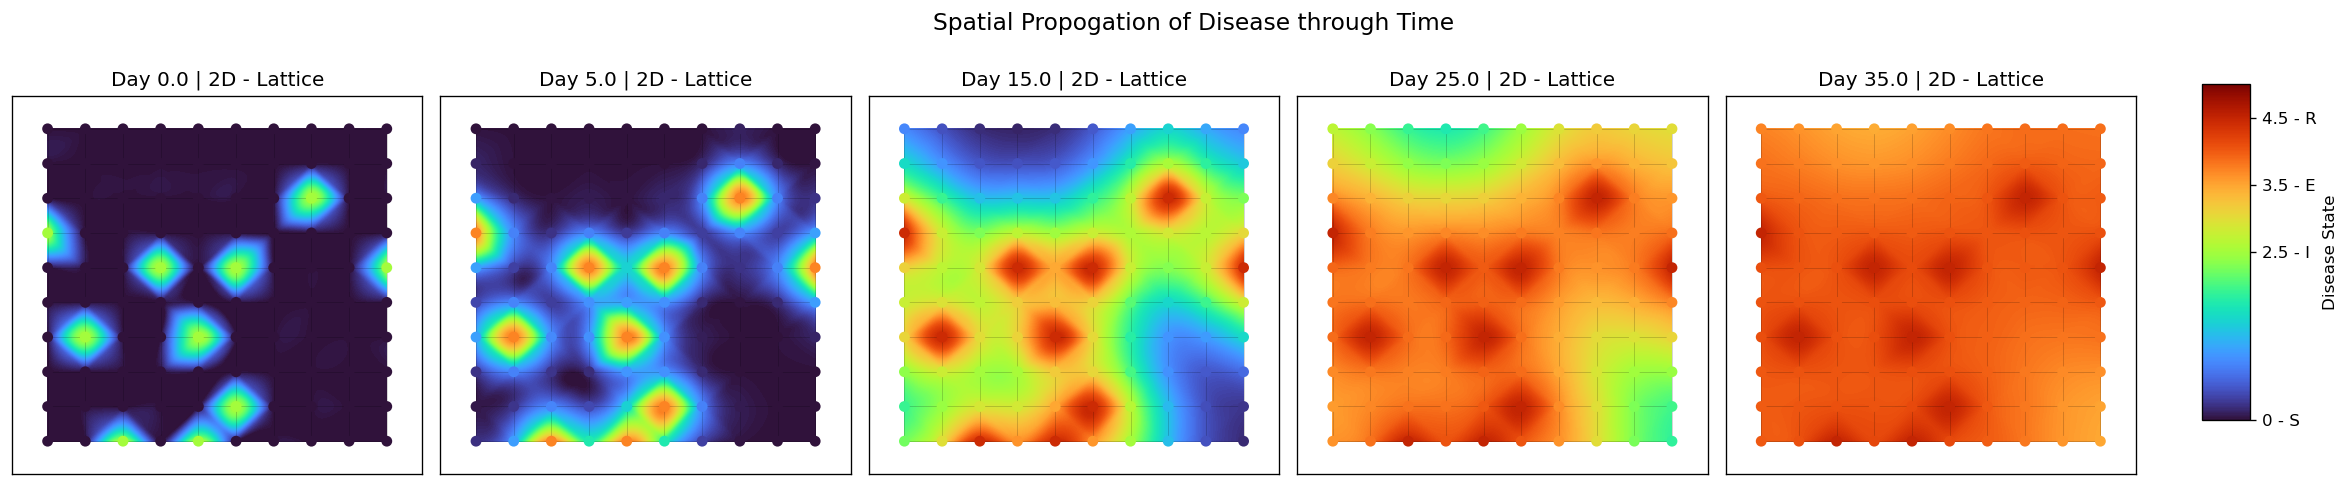

In [312]:
spread_visualization(lattice, pos(lattice, 'Lattice'), solution_lattice, 'turbo', '2D - Lattice', (0, 2.5, 3.5, 4.5), [0, 5, 15, 25, 35])

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/1169500941.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 2400x480 with 6 Axes>,
 array([<Axes: title={'center': 'Day 0.0 | Small-World'}>,
        <Axes: title={'center': 'Day 5.0 | Small-World'}>,
        <Axes: title={'center': 'Day 15.0 | Small-World'}>,
        <Axes: title={'center': 'Day 25.0 | Small-World'}>,
        <Axes: title={'center': 'Day 35.0 | Small-World'}>], dtype=object))

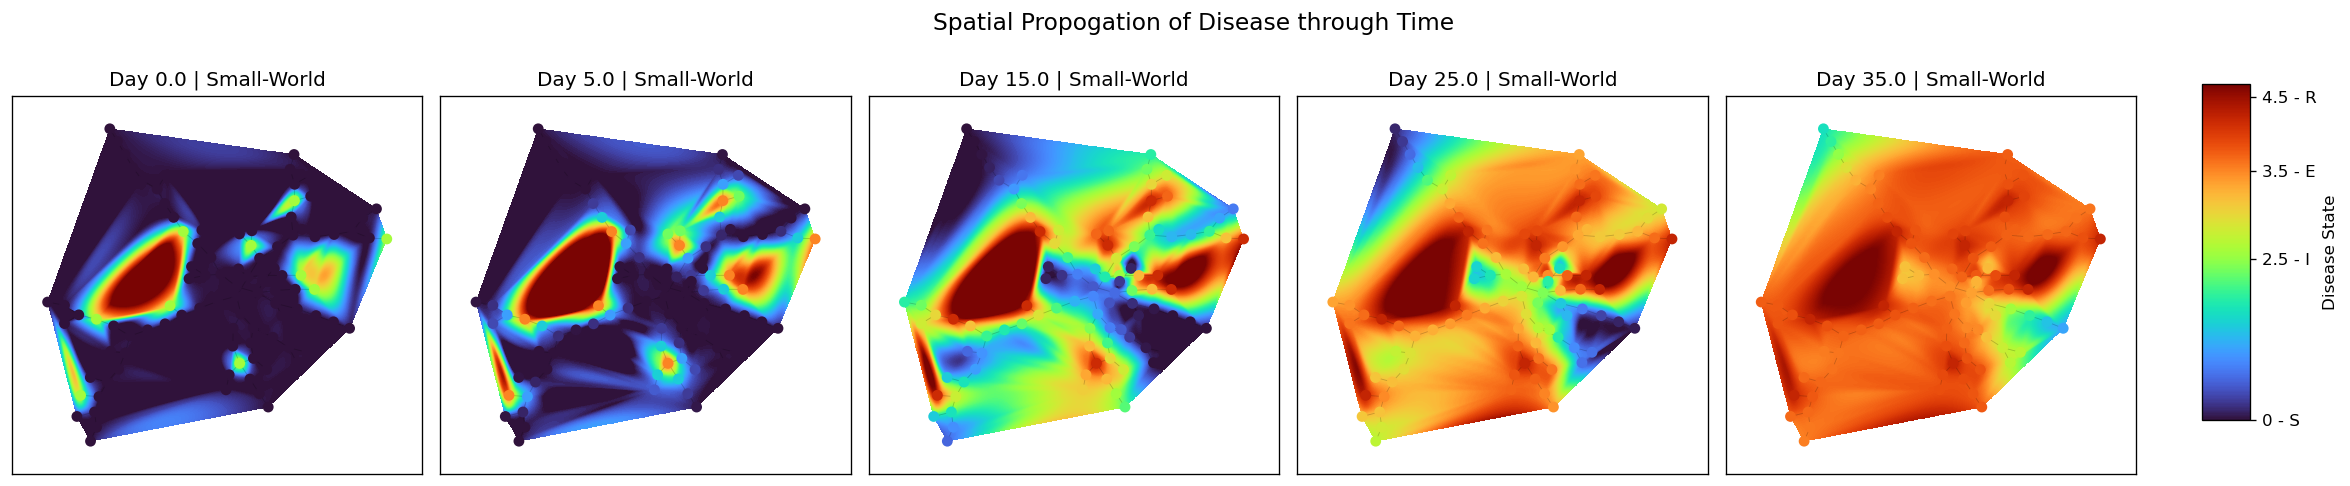

In [290]:
spread_visualization(small_world, nx.kamada_kawai_layout(small_world), solution_sw, 'turbo', 'Small-World', (0, 2.4, 3.7, 4.8), [0, 5, 15, 25, 35])

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/1169500941.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 2400x480 with 6 Axes>,
 array([<Axes: title={'center': 'Day 0.0 | Scale-Free'}>,
        <Axes: title={'center': 'Day 5.0 | Scale-Free'}>,
        <Axes: title={'center': 'Day 15.0 | Scale-Free'}>,
        <Axes: title={'center': 'Day 25.0 | Scale-Free'}>,
        <Axes: title={'center': 'Day 35.0 | Scale-Free'}>], dtype=object))

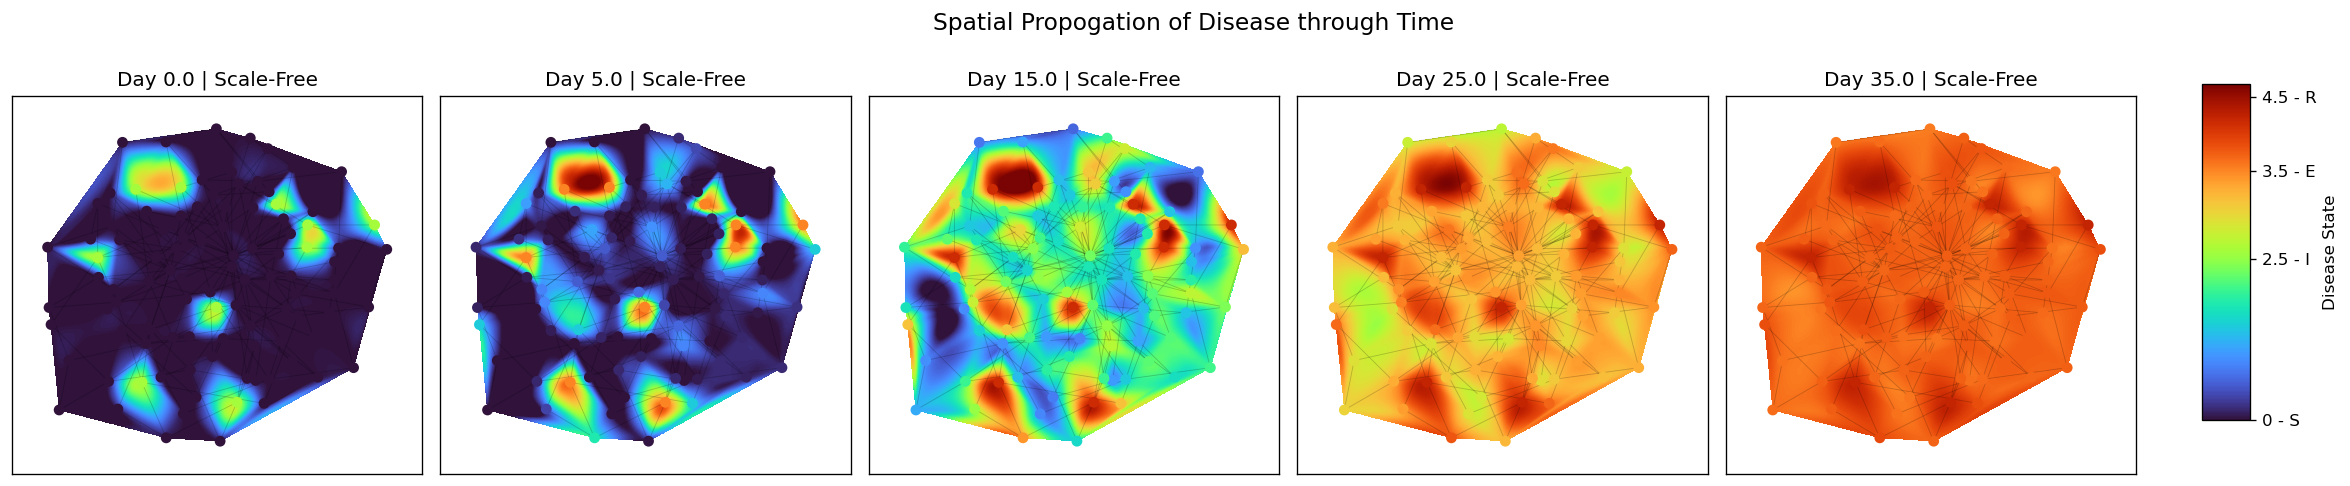

In [291]:
spread_visualization(scale_free, nx.kamada_kawai_layout(scale_free), solution_sf, 'turbo', 'Scale-Free', (0, 2.4, 3.7, 4.8), [0, 5, 15, 25, 35])

### (f) Integrate the generalized SEIR model that describes the behavior of an entire population that uniformly interacts (i.e., the system without the network model and limited connectivity). Plot the results, and assess how the general population model compares to the network models that you have already analyzed. Then estimate effective $\beta$, $\sigma$, and $\gamma$ parameters for the general population model that enables it to most closely match the behavior of the network models. Can you rationalize the influence of the network’s connectivity on these rates?

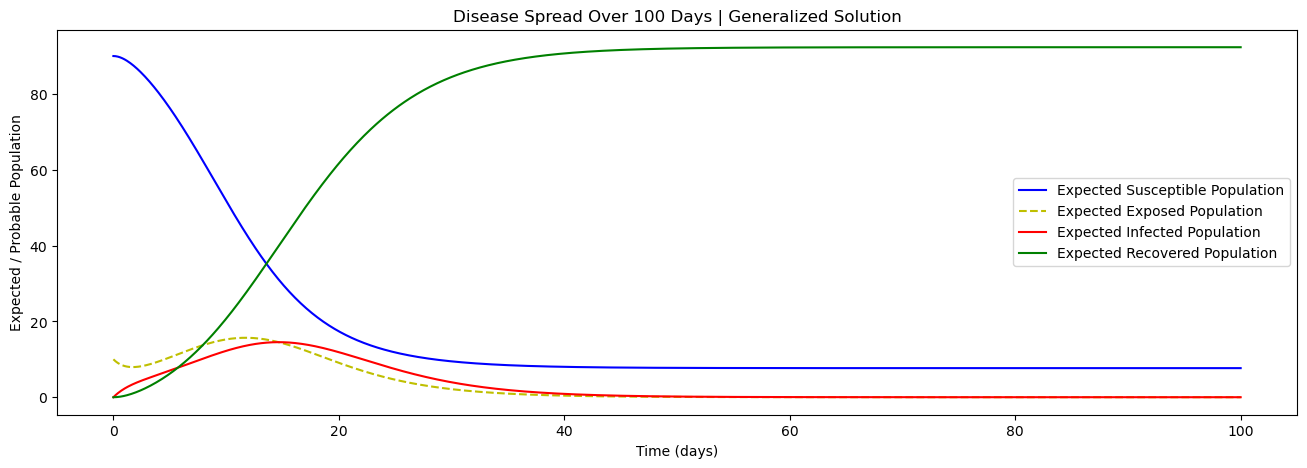

In [122]:
def generalized_model(t, y, beta, sigma, gamma):

    S, E, I, R = y

    N = sum(y)

    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I

    return [dSdt, dEdt, dIdt, dRdt]

y0 = [90, 10, 0, 0]

generalized_solution = sc.integrate.odeint(generalized_model, y0, t, args=(beta, sigma, gamma), tfirst=True)

S, E, I, R = generalized_solution.T

fig, ax = plt.subplots(figsize=(16,5))

ax.plot(t, S, '-b', label='Expected Susceptible Population')
ax.plot(t, E, '--y', label='Expected Exposed Population')
ax.plot(t, I, '-r', label='Expected Infected Population')
ax.plot(t, R, 'g', label='Expected Recovered Population')
ax.set_title(f'Disease Spread Over 100 Days | Generalized Solution')
ax.set_ylabel('Expected / Probable Population')
ax.set_xlabel('Time (days)')
ax.legend()

#### **Generalized ODE Solution Analysis**:
---

The following generalized model is very close to the network model we have built, with the only stark difference being that the rate of convergence to an equilibrium of S, E, I, and R levels being faster. A hypothesis on how we can make this generalized solution more closely match the network models is to simply slow down the rates that determine infection, exposed to infection, and recovery rates. Slowing these down allows for the convergence to take hold over a longer duration of time.

We can confirm this hypothesis by creating a contour plot, holding one value constant and manipulating 2 rates while viewing how the difference between the two models hold (the sum of S, E, I, and R). The lowest difference would correspond to the best parameters that make our generalized model as accurate as possible to the network models. We can simulate this contour plot for all 3 models to see the differences.

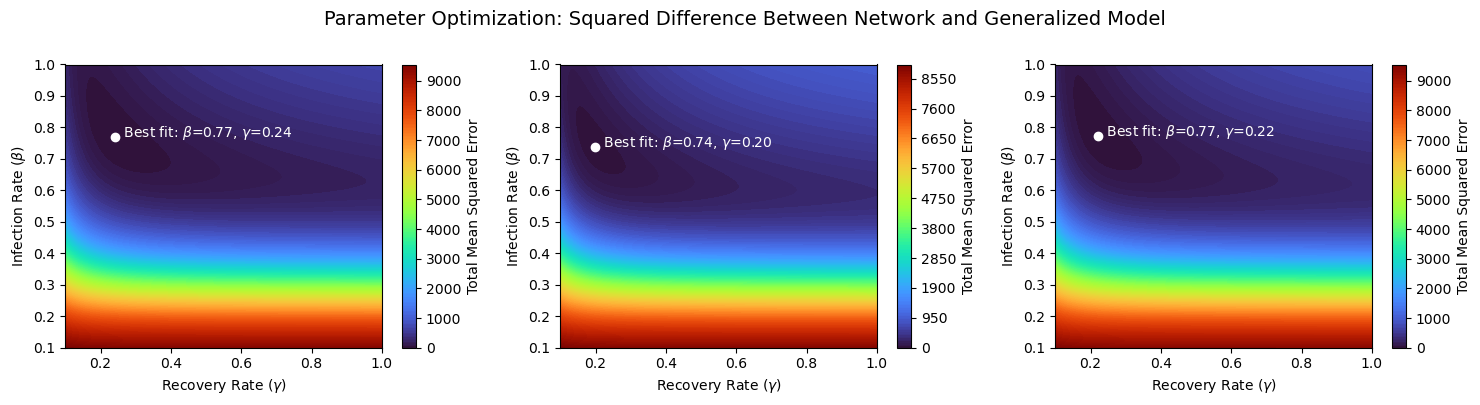

In [ ]:
def model_difference(beta, sigma, gamma, solution):

    generalized_solution = sc.integrate.odeint(generalized_model, y0, t, args=(beta, sigma, gamma), tfirst=True)

    net_S = np.sum(solution[:, 0::4], axis=1)
    net_E = np.sum(solution[:, 1::4], axis=1)
    net_I = np.sum(solution[:, 2::4], axis=1)
    net_R = np.sum(solution[:, 3::4], axis=1)

    # Calculate mean squared error across all components
    mse_S = np.mean((generalized_solution[:,0] - net_S)**2)
    mse_E = np.mean((generalized_solution[:,1] - net_E)**2)
    mse_I = np.mean((generalized_solution[:,2] - net_I)**2)
    mse_R = np.mean((generalized_solution[:,3] - net_R)**2)

    squared_error = mse_S + mse_E + mse_I + mse_R

    return squared_error

beta_range = np.linspace(0.1, 1.0, 200)
gamma_range = np.linspace(0.1, 1.0, 200)
sigma = 0.3

diff_matrix_lattice = np.zeros((len(beta_range), len(gamma_range)))
diff_matrix_sw = np.zeros((len(beta_range), len(gamma_range)))
diff_matrix_sf = np.zeros((len(beta_range), len(gamma_range)))
for i, beta in enumerate(beta_range):
    for j, gamma in enumerate(gamma_range):
        diff_matrix_lattice[i, j] = model_difference(beta, gamma, sigma, solution_lattice)
        diff_matrix_sw[i, j] = model_difference(beta, gamma, sigma, solution_sw)
        diff_matrix_sf[i, j] = model_difference(beta, gamma, sigma, solution_sf)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

contour_lattice = ax[0].contourf(gamma_range, beta_range, diff_matrix_lattice, 200, cmap='turbo')
contour_sw = ax[1].contourf(gamma_range, beta_range, diff_matrix_sw, 200, cmap='turbo')
contour_sf = ax[2].contourf(gamma_range, beta_range, diff_matrix_sf, 200, cmap='turbo')

contour_list = [contour_lattice, contour_sw, contour_sf]
diff_matrix_list = [diff_matrix_lattice, diff_matrix_sw, diff_matrix_sf]
min_idx_list = [np.unravel_index(np.argmin(matrix), matrix.shape) for matrix in diff_matrix_list]

for i in range(len(ax)):
    ax[i].set_xlabel('Recovery Rate Parameter ($\\gamma$)')
    ax[i].set_ylabel('Infection Rate Parameter ($\\beta$)')
    plt.colorbar(contour_list[i], label='Total Mean Squared Error')
    best_beta = beta_range[min_idx_list[i][0]]
    best_gamma = gamma_range[min_idx_list[i][1]]
    ax[i].plot(best_gamma, best_beta, 'wo')
    ax[i].text(best_gamma, best_beta, f'  Best fit: $\\beta$={best_beta:.2f}, $\\gamma$={best_gamma:.2f}', color='white')

fig.suptitle('Parameter Optimization: Squared Difference Between Network and Generalized Model', y=1.00, fontsize=14)
fig.tight_layout()

#### **Parameter Optimization Analysis**:
---

The closest fits to the network model have the generalized model with a slightly lower beta parameter (from default 0.8 to 0.74) and a significantly lower gamma parameter (from default 0.3 to 0.22). This brings forward the idea that having a lower recovery rate will allow the disease propogation to last longer which is what we predict will bring the generalized model closer to the network models. The network models reach an approximate equilibrium close to 60 days, while the generalized model reaches equilibrium very quickly at approximately 40 days.

### (g) Find the cumulative populations of S, E, I, and R over time for each network. Differentiate the global S, E, I, and R populations with respect to time. Plot and discuss the results.

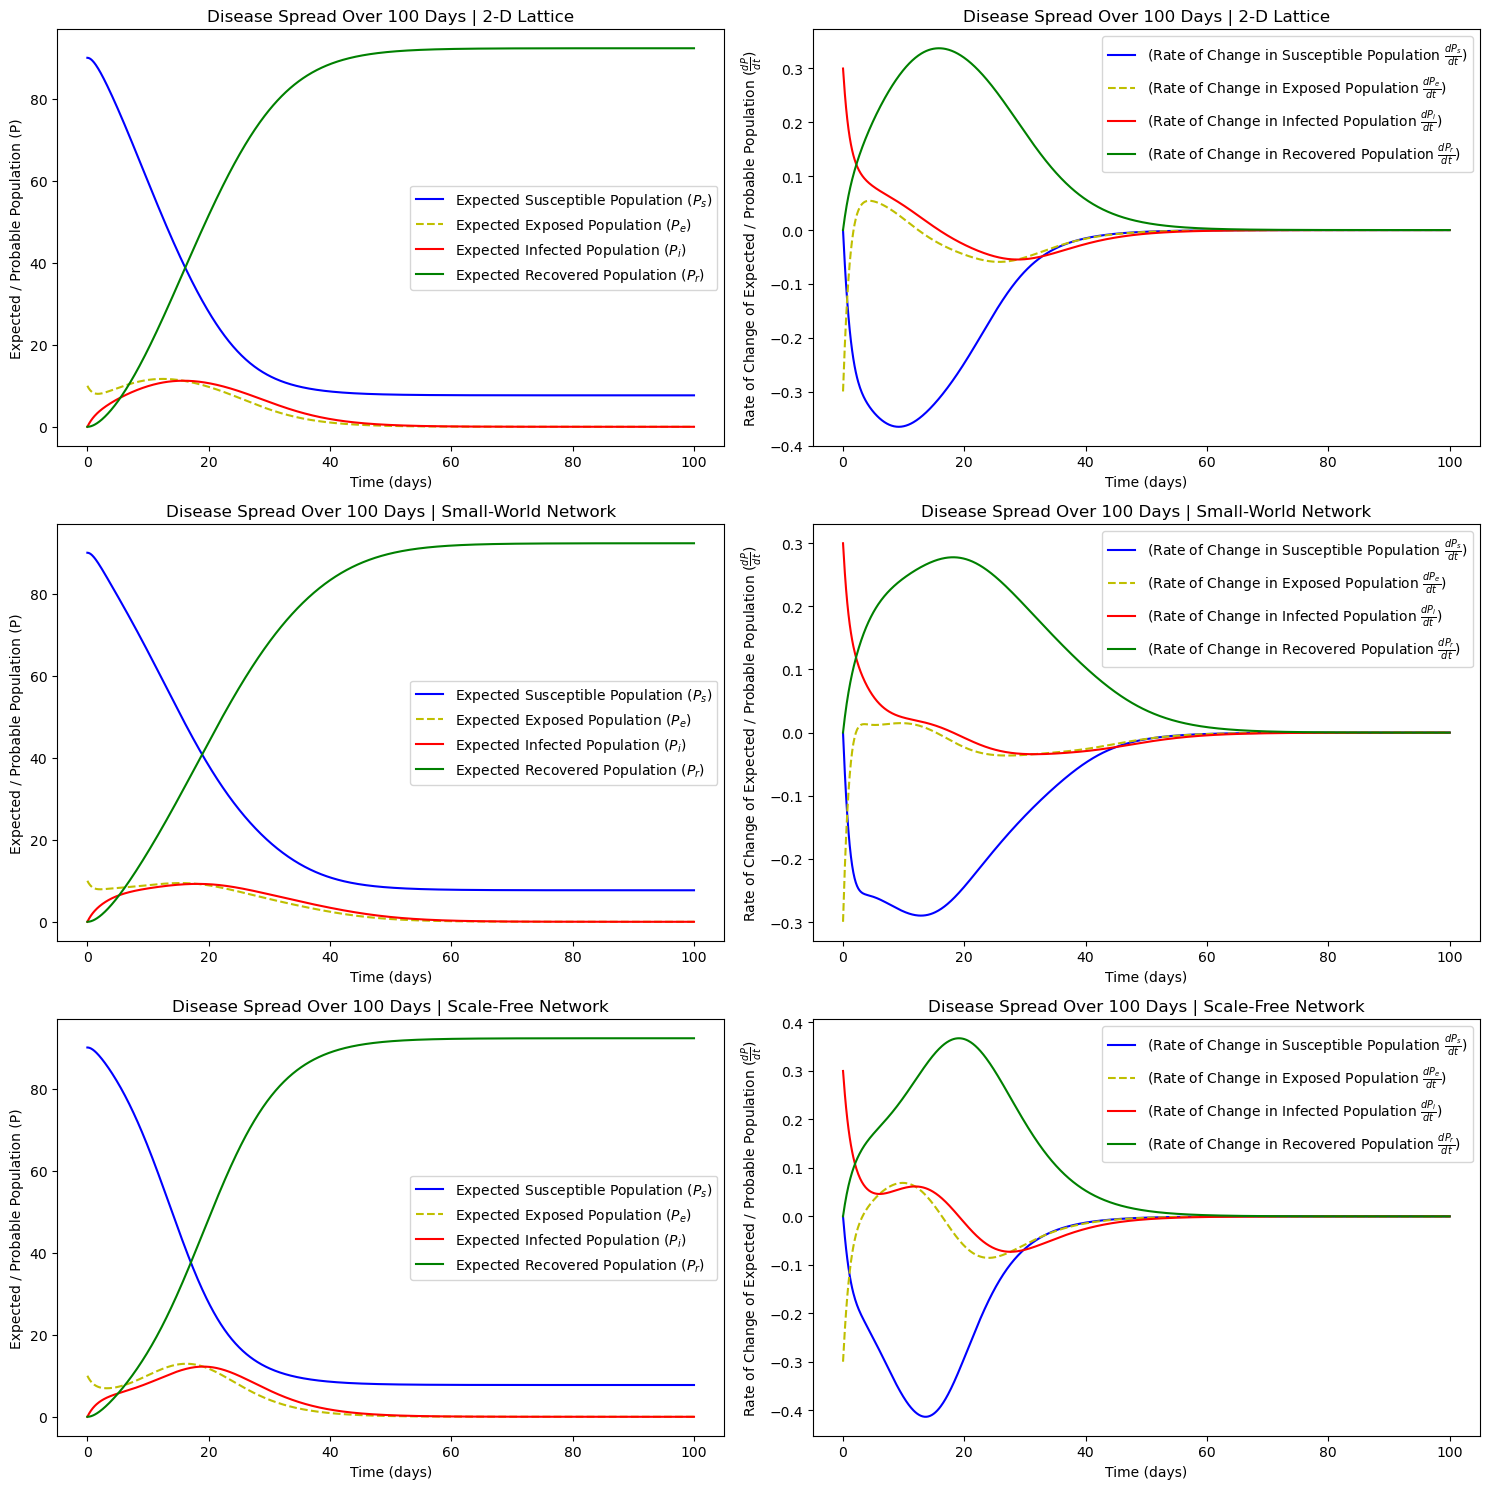

In [143]:
t = np.linspace(0, 100, 1000)
beta = 0.8
sigma = 0.3
gamma = 0.3

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

for i, solution in enumerate([solution_lattice, solution_sw, solution_sf]):
    susceptible_sum = np.sum(solution[:, 0::4], axis=1)
    exposed_sum = np.sum(solution[:, 1::4], axis=1)
    infected_sum = np.sum(solution[:, 2::4], axis=1)
    recovered_sum = np.sum(solution[:, 3::4], axis=1)

    ax[i][0].plot(t, susceptible_sum, '-b', label='Expected Susceptible Population ($P_{s}$)')
    ax[i][1].plot(t, np.gradient(susceptible_sum, edge_order=2), '-b', label='(Rate of Change in Susceptible Population $\\frac{dP_{s}}{dt}$)')

    ax[i][0].plot(t, exposed_sum, '--y', label='Expected Exposed Population ($P_{e}$)')
    ax[i][1].plot(t, np.gradient(exposed_sum, edge_order=2), '--y', label='(Rate of Change in Exposed Population $\\frac{dP_{e}}{dt}$)')

    ax[i][0].plot(t, infected_sum, '-r', label='Expected Infected Population ($P_{i}$)')
    ax[i][1].plot(t, np.gradient(infected_sum, edge_order=2), '-r', label='(Rate of Change in Infected Population $\\frac{dP_{i}}{dt}$)')

    ax[i][0].plot(t, recovered_sum, 'g', label='Expected Recovered Population ($P_{r}$)')
    ax[i][1].plot(t, np.gradient(recovered_sum, edge_order=2), 'g', label='(Rate of Change in Recovered Population $\\frac{dP_{r}}{dt}$)')

for i in range(len(ax[1]) + 1):
    for j in range(len(ax[0])):
        if j == 0:
            ax[i][j].set_title(f'Disease Spread Over 100 Days | {solution_name[i]}')
            ax[i][j].set_ylabel('Expected / Probable Population (P)')
            ax[i][j].set_xlabel('Time (days)')
            ax[i][j].legend()
        else:
            ax[i][j].set_title(f'Disease Spread Over 100 Days | {solution_name[i]}')
            ax[i][j].set_ylabel('Rate of Change of Expected / Probable Population ($\\frac{dP}{dt}$)')
            ax[i][j].set_xlabel('Time (days)')
            ax[i][j].legend()

fig.tight_layout()

#### **Differentiated Solution Analysis**:
---

As expected, the graphs of the gradient of population arrays plotted with respect to time are similar across all networks since their original solution vectors plotted were already quite similar. However, we can notice deviations more easily as sudden spikes or stagnations occur in the disease spread rate with population levels differentiated with respect to time. This can be explained by localized events occuring within the network such as a network where very low or very high nodal degrees allow for more or less disease spread.

### (h) Perform a linear regression between the average degree of the networks and the maximum number of infected people. Are they linearly related?

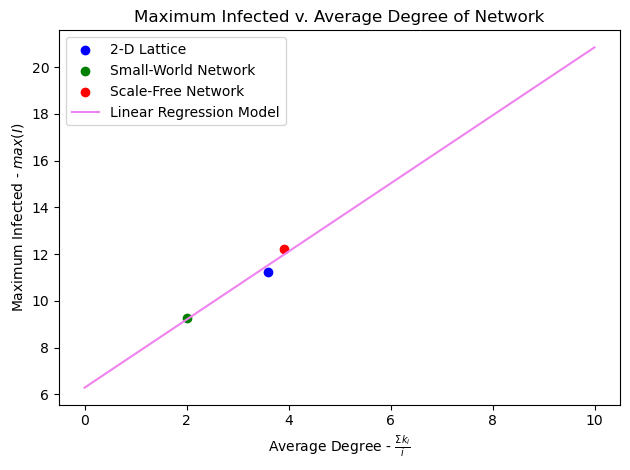

In [179]:
avg_degree_lattice = sum(degree_sequence_list[0]) / len(degree_sequence_list[0])
avg_degree_sw = sum(degree_sequence_list[1]) / len(degree_sequence_list[1])
avg_degree_sf = sum(degree_sequence_list[2]) / len(degree_sequence_list[2])

average_degree = np.array([avg_degree_lattice, avg_degree_sw, avg_degree_sf])

max_list = []
for i, solution in enumerate([solution_lattice, solution_sw, solution_sf]):
    max_infected_sum = np.max(np.sum(solution[:, 2::4], axis=1))
    max_list.append(max_infected_sum)

max_infected = np.array(max_list)

fig, ax = plt.subplots()

x = np.linspace(0, 10, 1000)
linear_model = sc.stats.linregress(average_degree, max_infected)

for i, _ in enumerate(average_degree):
    ax.scatter(average_degree[i], max_infected[i], color=colors[i], label=solution_name[i])

ax.plot(x, linear_model.slope * x + linear_model.intercept, color='violet', label='Linear Regression Model')
ax.set_title('Maximum Infected v. Average Degree of Network')
ax.set_xlabel('Average Degree - $\\frac{\\Sigma{k_{i}}}{i}$')
ax.set_ylabel('Maximum Infected - $max(I)$')
ax.legend()

fig.tight_layout()

#### **Linear Regression Analysis**:
---

We can see that there is indeed a linear relationship between average degree and maximum infected. It is intuitive that with more connections and more avenues for disease propogation to take, the more disease spread will occur, meaning infections, and thus maximum infections will be high.

### (!) Create an animation or movie of contour plots indicating the evolution of the disease through the lattice network with time.

## 2 ~ Adding Sophistication to the Model

### (a) The disease now evolves to become capable of reinfection, which means that recovered individuals now become susceptible to the disease again at a rate $\delta$. Update your system of equations and explain the change you made. How does adding a reinfection rate increase or decrease the spread of the disease? Does it vary between network structures?

#### The new system of differential equations that define our network's behavior
---

For each node, $i$, the states evolve as:
$$
\\[0.15in]
\dfrac{\mathrm{d}S_{i}}{\mathrm{d}t} = -\beta S_{i}P_{I,i} + \delta R_{i}
\\[0.05in] \text{Susceptibile probability's change in time is negative the product of infection rate, infection pressure, and susceptible probability plus the product of susceptibility rate and recovered probability}
\\[0.15in]
\dfrac{\mathrm{d}E_{i}}{\mathrm{d}t} = \beta S_{i}P_{I,i} - \sigma E_{i}
\\[0.05in]\text{Exposure probability's change in time is negative susceptibility rate of change minus the product of exposure to infected rate and exposure probability.}
\\[0.1in]
\dfrac{\mathrm{d}I_{i}}{\mathrm{d}t} = \sigma E_{i} - \gamma I_{i}
\\[0.05in]\text{Infected probability's change in time is the product of exposure to infected rate and exposure probability minus the product of recovery rate and infected probability.}
\\[0.15in]
\dfrac{\mathrm{d}R_{i}}{\mathrm{d}t} = \gamma I_{i} - \delta R_{i}
\\[0.05in]\text{The rate at which recovery probability changes over time is the product of recovery rate and infected probability minus the product of susceptibility rate and recovered probability.}
$$

Where $\beta$ is the infection rate, $\sigma$ is the rate at which exposed individuals become infectious, $\gamma$ is the recovery rate, $\delta$ is the susceptibility rate, and $N$ is the total population size. $P_{I,i}$ is the infection pressure, or average “infectiousness” of the node $i$’s neighbors. 

$$
\text{Infection Pressure:}\ P_{I,i} = \frac{\Sigma_{j \in \text{neighbors}(i)}I_{j}}{k_{i}} \Rightarrow \text{Simply the average infection probability of a node's neighbors}
$$

#### **ODE Solution Analysis**:
---

The following system is very close to the previous system, however with the introduction of reinfection and thus a new parameter of susceptibility rate, the differential equations that are impacted are the equations that encompass change in susceptibility and change in recovery. Recovery rates will decrease due to recovered individuals become susceptible again, and susceptibility rates will no longer strictly be tied to a negative value but has a positive term due to individual nodes becoming susceptible after recovery.

Given the system of differential equations, and a network of nodes we can use to simulate the system - we need to set a 'state' to each node ($i$) that describes the following $X_{i}$ values, 
where $X$ ranges from $S$, $E$, $I$, and $R$.

##### Setting Susceptible & Exposed States ~ Choosing $\delta$ = 0.1

##### ODE Model Function

In [273]:
def sophisticated_model(t, y, network, beta, sigma, gamma, delta):

    dydt = np.zeros_like(y)
    nodes = list(network.nodes())

    for i, node in enumerate(nodes):

        idx = i * 4

        S = y[idx]
        E = y[idx + 1]
        I = y[idx + 2]
        R = y[idx + 3]

        infected_neighbors = []
        neighbors = list(network.neighbors(node))

        if neighbors:
            for neighbor in neighbors:
                n = nodes.index(neighbor) * 4 + 2
                infected_neighbors.append(y[n])
            P = sum(infected_neighbors) / len(infected_neighbors)
        else:
            P = 0

        dSdt = -beta * S * P + delta * R
        dEdt = beta * S * P - sigma * E
        dIdt = sigma * E - gamma * I
        dRdt = gamma * I - delta * R

        dydt[i * 4] = dSdt
        dydt[i * 4 + 1] = dEdt
        dydt[i * 4 + 2] = dIdt
        dydt[i * 4 + 3] = dRdt

    return dydt

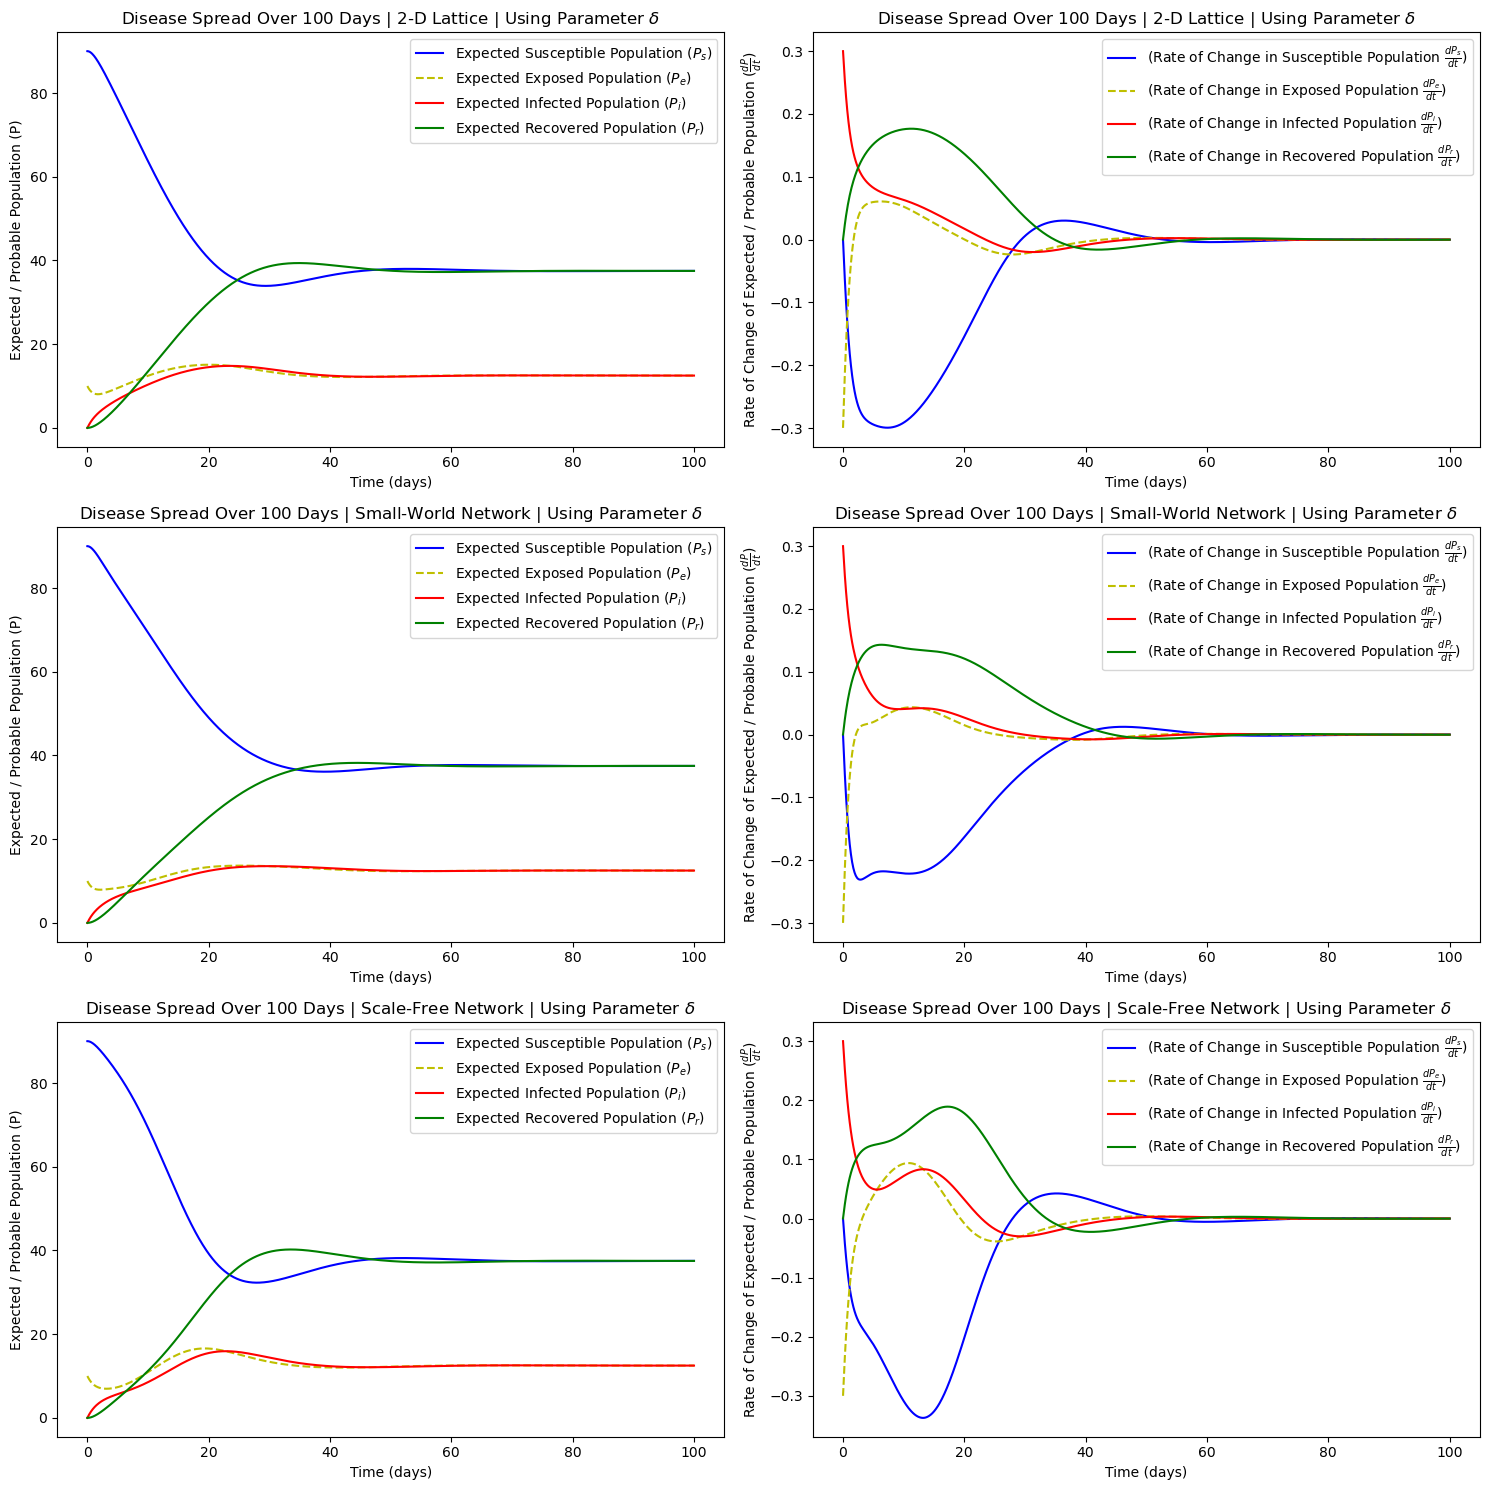

In [274]:
t = np.linspace(0, 100, 1000)
beta = 0.8
sigma = 0.3
gamma = 0.3
delta = 0.1

y0_lattice_soph = [lattice.nodes[node]['state'].get(state) for node in lattice for state in ['S', 'E', 'I', 'R']]
y0_small_world_soph = [lattice.nodes[node]['state'].get(state) for node in lattice for state in ['S', 'E', 'I', 'R']]
y0_scale_free_soph = [lattice.nodes[node]['state'].get(state) for node in lattice for state in ['S', 'E', 'I', 'R']]


solution_lattice_soph = sc.integrate.odeint(sophisticated_model, y0_lattice_soph, t, args=(lattice, beta, sigma, gamma, delta), tfirst=True)
solution_sw_soph = sc.integrate.odeint(sophisticated_model, y0_small_world_soph, t, args=(small_world, beta, sigma, gamma, delta), tfirst=True)
solution_sf_soph = sc.integrate.odeint(sophisticated_model, y0_scale_free_soph, t, args=(scale_free, beta, sigma, gamma, delta), tfirst=True)

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

for i, solution in enumerate([solution_lattice_soph, solution_sw_soph, solution_sf_soph]):
    susceptible_sum_soph = np.sum(solution[:, 0::4], axis=1)
    exposed_sum_soph = np.sum(solution[:, 1::4], axis=1)
    infected_sum_soph = np.sum(solution[:, 2::4], axis=1)
    recovered_sum_soph = np.sum(solution[:, 3::4], axis=1)

    ax[i][0].plot(t, susceptible_sum_soph, '-b', label='Expected Susceptible Population ($P_{s}$)')
    ax[i][1].plot(t, np.gradient(susceptible_sum_soph, edge_order=2), '-b', label='(Rate of Change in Susceptible Population $\\frac{dP_{s}}{dt}$)')

    ax[i][0].plot(t, exposed_sum_soph, '--y', label='Expected Exposed Population ($P_{e}$)')
    ax[i][1].plot(t, np.gradient(exposed_sum_soph, edge_order=2), '--y', label='(Rate of Change in Exposed Population $\\frac{dP_{e}}{dt}$)')

    ax[i][0].plot(t, infected_sum_soph, '-r', label='Expected Infected Population ($P_{i}$)')
    ax[i][1].plot(t, np.gradient(infected_sum_soph, edge_order=2), '-r', label='(Rate of Change in Infected Population $\\frac{dP_{i}}{dt}$)')

    ax[i][0].plot(t, recovered_sum_soph, 'g', label='Expected Recovered Population ($P_{r}$)')
    ax[i][1].plot(t, np.gradient(recovered_sum_soph, edge_order=2), 'g', label='(Rate of Change in Recovered Population $\\frac{dP_{r}}{dt}$)')

for i in range(len(ax)):
    for j in range(len(ax[0])):
        if j == 0:
            ax[i][j].set_title(f'Disease Spread Over 100 Days | {solution_name[i]} | Using Parameter $\\delta$')
            ax[i][j].set_ylabel('Expected / Probable Population (P)')
            ax[i][j].set_xlabel('Time (days)')
            ax[i][j].legend()
        else:
            ax[i][j].set_title(f'Disease Spread Over 100 Days | {solution_name[i]} | Using Parameter $\\delta$')
            ax[i][j].set_ylabel('Rate of Change of Expected / Probable Population ($\\frac{dP}{dt}$)')
            ax[i][j].set_xlabel('Time (days)')
            ax[i][j].legend()

fig.tight_layout()

#### ***Sophisticated Model Analysis***:
---

**Disease Spread**:
The introduction of parameter delta brought on very interesting results. Previously, the model predicted an equilibrium of susceptible and recovered nodes. The overwhelming majority of nodes (90) were recovered while 10 nodes were never infected (most likely due to their isolation compounded with fast recovery rates). The exposed and infected populations both fall to 0 as the disease spread ends as inevitably all infected nodes become either recovered or remain susceptible (isolated). In the sophisticated model, however, we see that there is a shared equilibrium between susceptible and recovered populations and the same for infected and recovered. Based on the parameters we selected there is a perpetual reinfection that cycles through the network that allows the disease to continue for an infinite amount of time.

**Disease Spread Rate of Change**:
The rate of change of susceptibility always remained negative in the previous model, while the rate of change in recovery was always positive. The introduction of the paramter $\delta$ allows for the rate of change in the susceptible population to become positive and vice versa for the recovered populations. This cyclic behavior is what allows the equilibrium of a non-zero (infected + exposed) population; simply, we can visually see the feedback loop from S, E, I to R back to S. Furthermore, the small-world network as the lowest average degree which explains why the feedback loop (expressed by the inverse change in the gradient of recovery and susceptibility) is far less pronounced than the lattice and especially the scale-free network (which has the highest average degree). We can further analyze this by viewing the relationship between combined min and max gradients in relation to average degree.

##### We define a measurement ***X (either S, E, I, R) Gradient Difference, XGD for short*** which is a measurement tool we create so we can visually see the relationship between average degree value and gradient difference. By taking the absolute value of the max and min gradient, we can measure the absolute change in rate of X. The relationship implies the *cyclic nature of the propogation of disease is impacted by how isolated nodes are*:

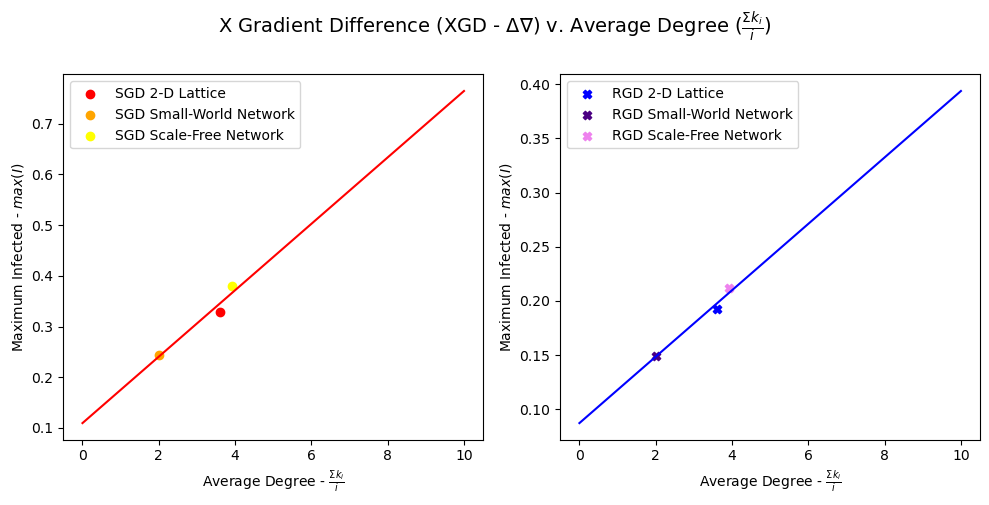

In [306]:
max_gradient_difference_s = []
max_gradient_difference_r = []
color_1 = ['red', 'orange', 'yellow']
color_2 =['blue', 'indigo', 'violet']
shape = ['o', 'v', 'X', 'D', 's', 'p']

for i, solution in enumerate([solution_lattice_soph, solution_sw_soph, solution_sf_soph]):
    s_grad = np.gradient(np.sum(solution[:, 0::4], axis=1), edge_order=2)
    e_grad = np.gradient(np.sum(solution[:, 1::4], axis=1), edge_order=2)
    i_grad = np.gradient(np.sum(solution[:, 2::4], axis=1), edge_order=2)
    r_grad = np.gradient(np.sum(solution[:, 3::4], axis=1), edge_order=2)
    max_gradient_difference_s.append(np.max(s_grad) + np.abs(np.min(s_grad)))
    max_gradient_difference_r.append(np.max(r_grad) + np.abs(np.min(r_grad)))

max_gradient_diff_s = np.array(max_gradient_difference_s)
max_gradient_diff_r = np.array(max_gradient_difference_r)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

linear_model_s = sc.stats.linregress(average_degree, max_gradient_diff_s)
linear_model_r = sc.stats.linregress(average_degree, max_gradient_diff_r)

fig.suptitle('X Gradient Difference (XGD - $\\Delta \\nabla$) v. Average Degree ($\\frac{\\Sigma{k_{i}}}{i}$)', y=1.00, fontsize=14)

x = np.linspace(0, 10, 1000)

for i, _ in enumerate(max_gradient_diff_s):
    ax[0].scatter(average_degree[i], max_gradient_diff_s[i], color=color_1[i], label=f'SGD {solution_name[i]}', marker='o')
    ax[1].scatter(average_degree[i], max_gradient_diff_r[i], color=color_2[i], label=f'RGD {solution_name[i]}', marker='X')

ax[0].plot(x, linear_model_s.slope * x + linear_model_s.intercept, color='red')
ax[1].plot(x, linear_model_r.slope * x + linear_model_r.intercept, color='blue')

for i in range(len(ax)):
    ax[i].set_xlabel('Average Degree - $\\frac{\\Sigma{k_{i}}}{i}$')
    ax[i].set_ylabel('Maximum Infected - $max(I)$')
    ax[i].legend()

fig.tight_layout()

#### ***XGD Linear Regression Analysis***:
---

Our previous hypothesis is confirmed, as the average degree of a network increases the more connected nature nodes have with each other allows for the spread of disease to be cyclic. We can visually view this through animating the contours with the new susceptibility variable $\delta$.

#### Contour Plot of Disease Propogation with $\delta$

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/1169500941.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 2400x480 with 6 Axes>,
 array([<Axes: title={'center': 'Day 0.0 | 2D - Lattice | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 5.0 | 2D - Lattice | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 15.0 | 2D - Lattice | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 25.0 | 2D - Lattice | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 35.0 | 2D - Lattice | w/ $\\delta$'}>],
       dtype=object))

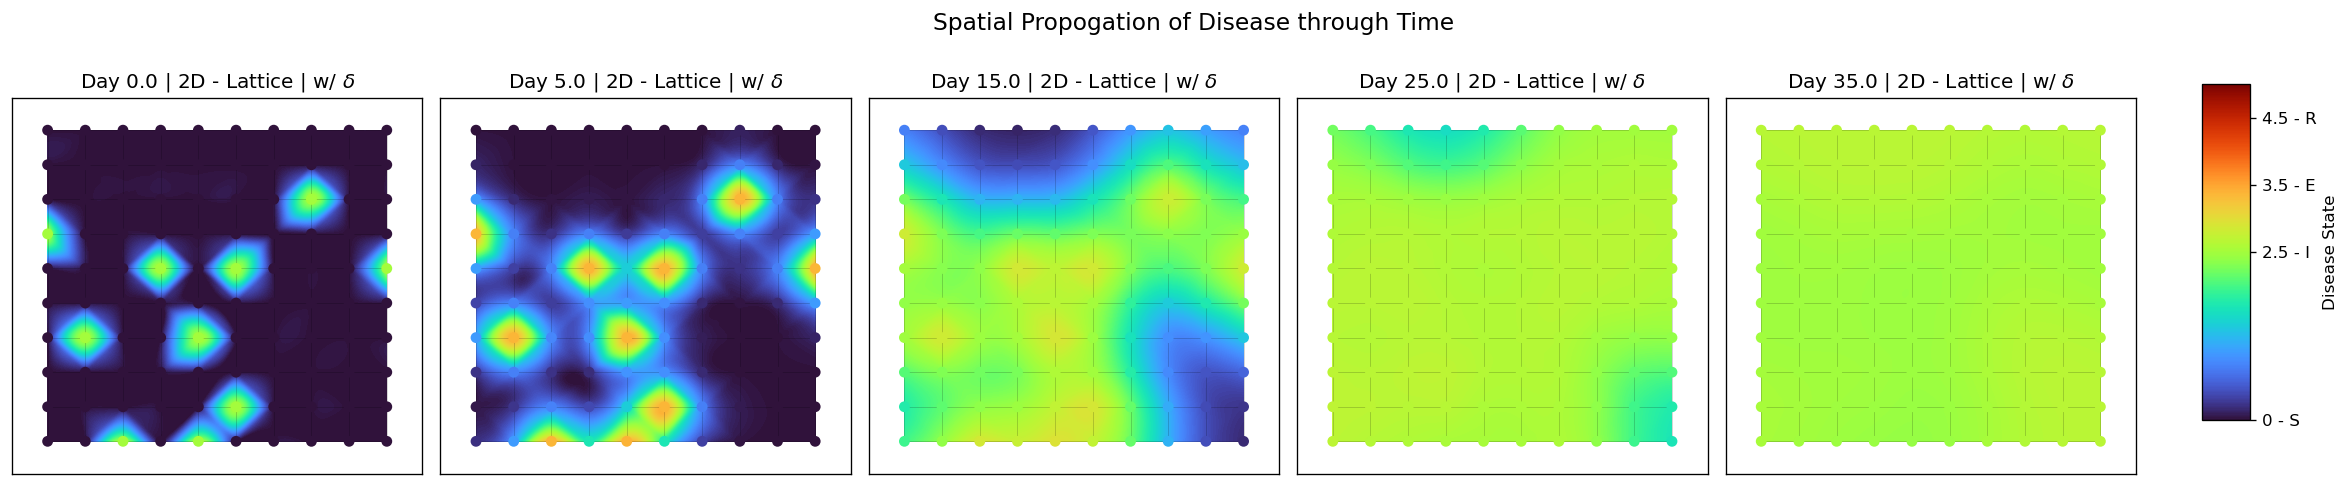

In [314]:
spread_visualization(lattice, pos(lattice, 'Lattice'), solution_lattice_soph, 'turbo', '2D - Lattice | w/ $\\delta$', (0, 2.5, 3.5, 4.5), [0, 5, 15, 25, 35])

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/1169500941.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 2400x480 with 6 Axes>,
 array([<Axes: title={'center': 'Day 0.0 | Small-World | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 5.0 | Small-World | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 15.0 | Small-World | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 25.0 | Small-World | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 35.0 | Small-World | w/ $\\delta$'}>],
       dtype=object))

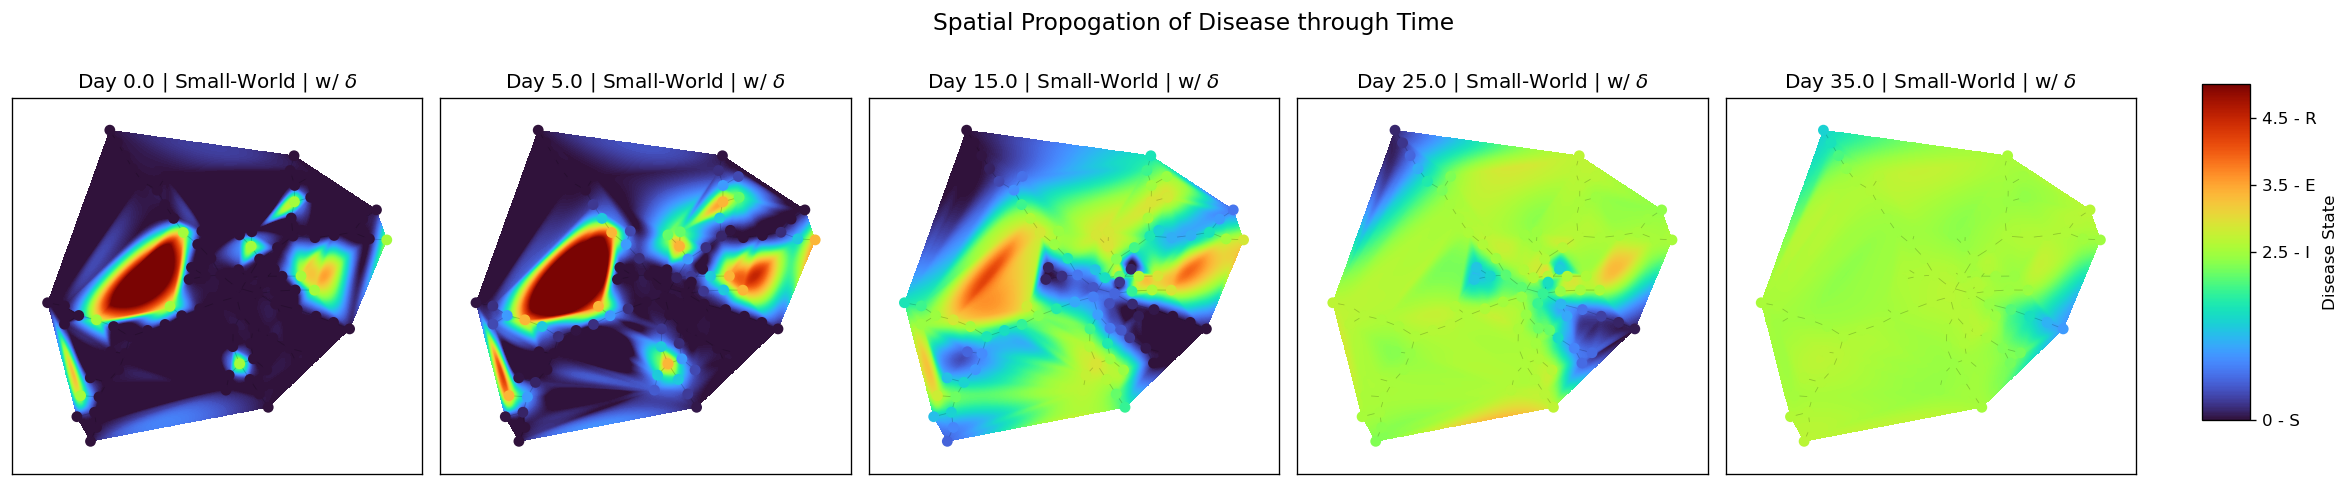

In [315]:
spread_visualization(small_world, nx.kamada_kawai_layout(small_world), solution_sw_soph, 'turbo', 'Small-World | w/ $\\delta$', (0, 2.5, 3.5, 4.5), [0, 5, 15, 25, 35])

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/1169500941.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 2400x480 with 6 Axes>,
 array([<Axes: title={'center': 'Day 0.0 | Scale-Free | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 5.0 | Scale-Free | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 15.0 | Scale-Free | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 25.0 | Scale-Free | w/ $\\delta$'}>,
        <Axes: title={'center': 'Day 35.0 | Scale-Free | w/ $\\delta$'}>],
       dtype=object))

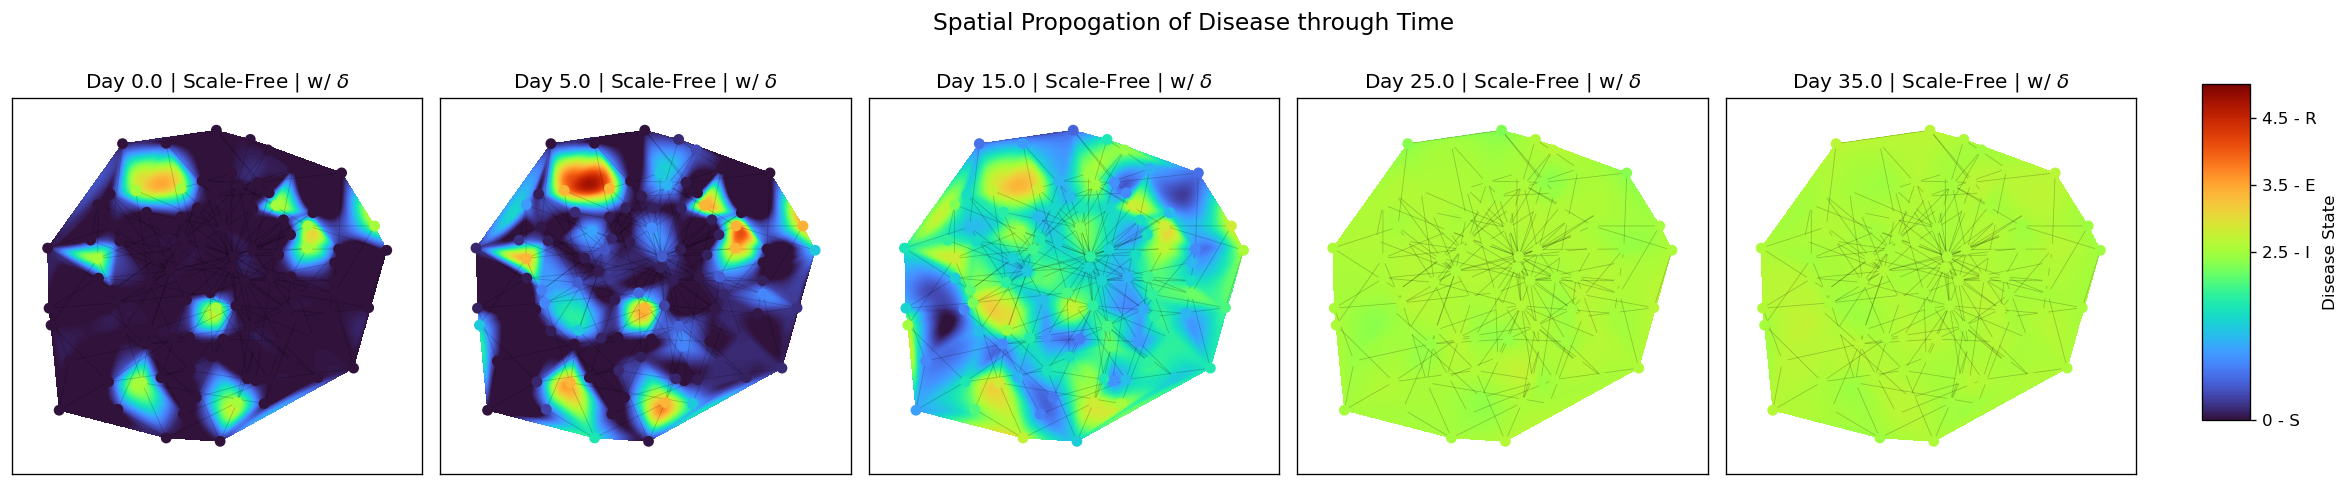

In [316]:
spread_visualization(scale_free, nx.kamada_kawai_layout(scale_free), solution_sf_soph, 'turbo', 'Scale-Free | w/ $\\delta$', (0, 2.5, 3.5, 4.5), [0, 5, 15, 25, 35])

#### ***Contour Plot Sophisticated Model Analysis***:
---

The unfortunate fundamental flaw in the contour plot set up is that it is not meant to handle cyclic disease propogation. Scaling recovery, exposure, infection, and susceptibility causes moments where there are both susceptible and recovered nodes; the interpolation set up causes a mix between high and low values and thus blending into what appears as an "infected" state.

### (b) Plot the maximum number of individuals infected as a function of beta and gamma for $\delta = \text{0.5 days}^{-1}$

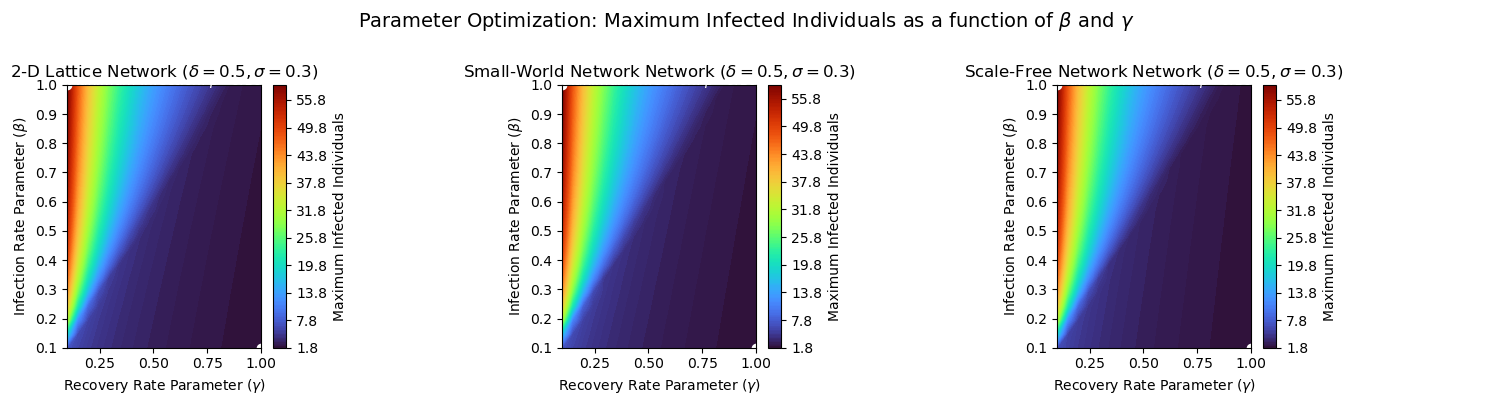

In [235]:
sophisticated_solution = sc.integrate.odeint(sophisticated_model, y0_lattice, t, args=(lattice, beta, sigma, gamma, delta), tfirst=True)
I = np.sum(sophisticated_solution[:, 2::4], axis=1)

def max_infected(beta, sigma, gamma, delta, network, y0):

    sophisticated_solution = sc.integrate.odeint(sophisticated_model, y0, t, args=(network, beta, sigma, gamma, delta), tfirst=True)

    I = np.sum(sophisticated_solution[:, 2::4], axis=1)

    return np.max(I)

beta_range = np.linspace(0.1, 1.0, 20)
gamma_range = np.linspace(0.1, 1.0, 20)
sigma = 0.3
delta = 0.5

infected_matrix_lattice = np.zeros((len(beta_range), len(gamma_range)))
infected_matrix_sw = np.zeros((len(beta_range), len(gamma_range)))
infected_matrix_sf = np.zeros((len(beta_range), len(gamma_range)))
for i, beta in enumerate(beta_range):
    for j, gamma in enumerate(gamma_range):
        infected_matrix_lattice[i, j] = max_infected(beta, sigma, gamma, delta, lattice, y0_lattice)
        infected_matrix_sw[i, j] = max_infected(beta, sigma, gamma, delta, small_world, y0_small_world)
        infected_matrix_sf[i, j] = max_infected(beta, sigma, gamma, delta, scale_free, y0_scale_free)

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

contour_lattice = ax[0].contourf(gamma_range, beta_range, infected_matrix_lattice, 200, cmap='turbo')
contour_sw = ax[1].contourf(gamma_range, beta_range, infected_matrix_sw, 200, cmap='turbo')
contour_sf = ax[2].contourf(gamma_range, beta_range, infected_matrix_sf, 200, cmap='turbo')

contour_list = [contour_lattice, contour_sw, contour_sf]
infected_matrix_list = [infected_matrix_lattice, infected_matrix_sw, infected_matrix_sf]
max_idx_list = [np.unravel_index(np.argmax(matrix), matrix.shape) for matrix in infected_matrix_list]
min_idx_list = [np.unravel_index(np.argmin(matrix), matrix.shape) for matrix in infected_matrix_list]

for i in range(len(ax)):
    ax[i].set_xlabel('Recovery Rate Parameter ($\\gamma$)')
    ax[i].set_ylabel('Infection Rate Parameter ($\\beta$)')
    plt.colorbar(contour_list[i], label='Maximum Infected Individuals')
    best_beta = beta_range[min_idx_list[i][0]]
    best_gamma = gamma_range[min_idx_list[i][1]]
    worst_beta = beta_range[max_idx_list[i][0]]
    worst_gamma = gamma_range[max_idx_list[i][1]]
    ax[i].plot(worst_gamma, worst_beta, 'wo')
    ax[i].plot(best_gamma, best_beta, 'wo')
    ax[i].text(worst_gamma, worst_beta, f'Maximum Infection: $\\beta$={best_beta:.2f}, $\\gamma$={best_gamma:.2f}', color='white')
    ax[i].text(best_gamma, best_beta, f'Minimum Infection: $\\beta$={best_beta:.2f}, $\\gamma$={best_gamma:.2f}', color='white')
    ax[i].set_title(f'{solution_name[i]} Network ($\\delta=0.5, \\sigma=0.3$)')

fig.suptitle('Parameter Optimization: Maximum Infected Individuals as a function of $\\beta$ and $\\gamma$', y=1.00, fontsize=14)
fig.tight_layout()

In [243]:
print(f"{max_infected(0, sigma, 1, delta, lattice, y0_lattice)} nodes infected with minimum beta and maximum gamma")
print(f"{max_infected(1, sigma, 0, delta, lattice, y0_lattice)} nodes infected with minimum beta and maximum gamma")

1.7906408002746392 nodes infected with minimum beta and maximum gamma
100.00000001974344 nodes infected with minimum beta and maximum gamma


#### ***Parameter Optimization of $\beta$ and $\gamma$ analysis***:
---

As expected, having a low recovery rate (0 at the extrema) and a high infection rate (1 at the extrema) will result in maximum number of individuals infected (100 expected infected nodes [full populus]). On the contrary, having a high recovery rate (1 at the extrema) and a low infection rate (0 at the extrema) will result in maximum number of individuals infected (1.79 expected infected nodes).

### (c) Issue positions to the nodes in each network and add a geographic distance effect where the infection pressure decreases exponentially with the distance between nodes. How does this change increase or decrease the speed and depth of the spread of the disease?

**How to Implement Geographic Distance**

Given that we already have access to the positions of each node using the NetworkX library, we can use the euclidean distance formula to find the distance between neighboring nodes.

$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

In [300]:
def dist(pos, node1, node2):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

In [301]:
def geo_sophisticated_model(t, y, network, beta, sigma, gamma, delta, pos):

    dydt = np.zeros_like(y)
    nodes = list(network.nodes())

    for i, node in enumerate(nodes):

        idx = i * 4

        S = y[idx]
        E = y[idx + 1]
        I = y[idx + 2]
        R = y[idx + 3]

        infected_neighbors = []
        neighbors = list(network.neighbors(node))

        if neighbors:
            for neighbor in neighbors:
                distance = dist(pos, node, neighbor)
                n = nodes.index(neighbor) * 4 + 2
                infected_neighbors.append(y[n] * np.exp(-distance))
            P = sum(infected_neighbors) / len(infected_neighbors)
        else:
            P = 0

        dSdt = -beta * S * P + delta * R
        dEdt = beta * S * P - sigma * E
        dIdt = sigma * E - gamma * I
        dRdt = gamma * I - delta * R

        dydt[i * 4] = dSdt
        dydt[i * 4 + 1] = dEdt
        dydt[i * 4 + 2] = dIdt
        dydt[i * 4 + 3] = dRdt

    return dydt

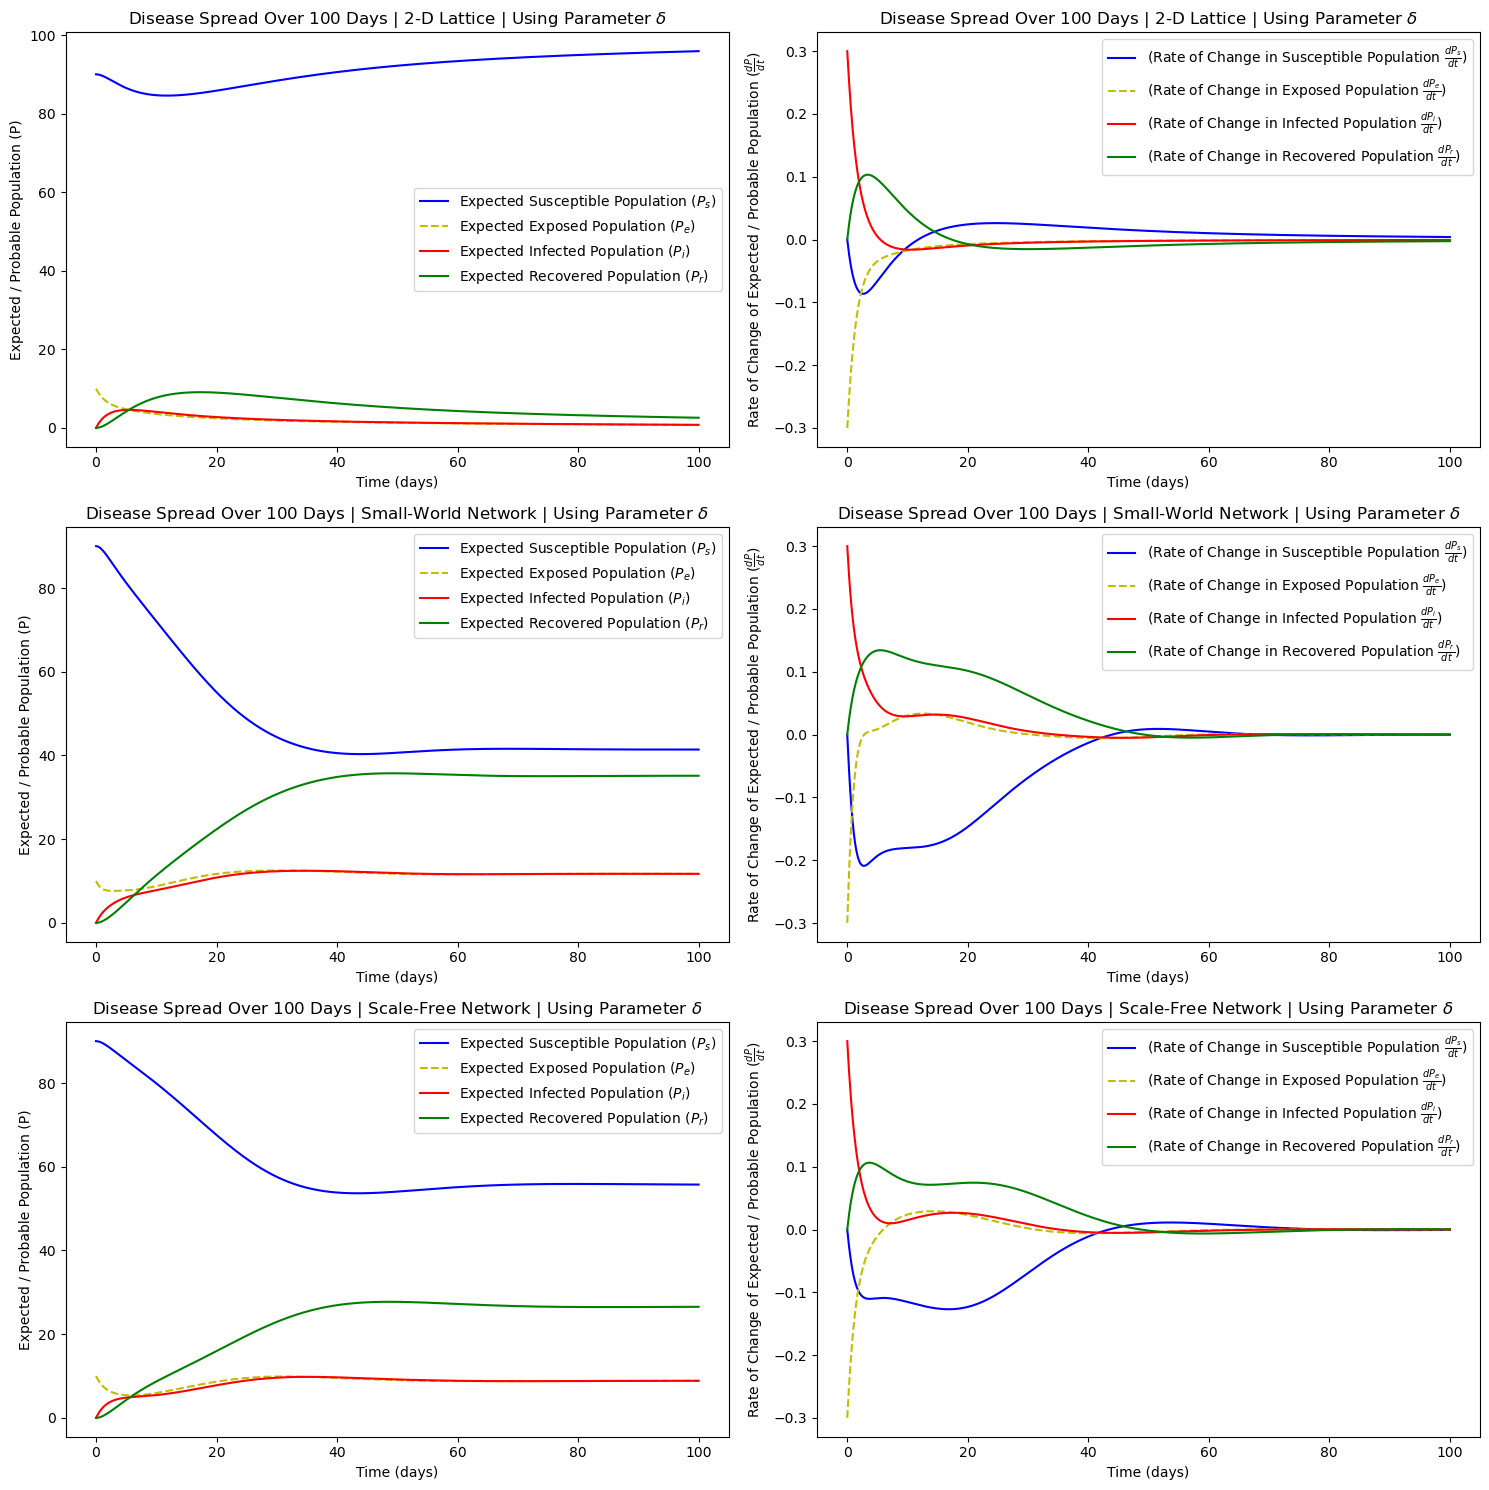

In [324]:
t = np.linspace(0, 100, 1000)
beta = 0.8
sigma = 0.3
gamma = 0.3
delta = 0.1

y0_lattice_soph = [lattice.nodes[node]['state'].get(state) for node in lattice for state in ['S', 'E', 'I', 'R']]
y0_small_world_soph = [lattice.nodes[node]['state'].get(state) for node in lattice for state in ['S', 'E', 'I', 'R']]
y0_scale_free_soph = [lattice.nodes[node]['state'].get(state) for node in lattice for state in ['S', 'E', 'I', 'R']]


geo_solution_lattice_soph = sc.integrate.odeint(geo_sophisticated_model, y0_lattice_soph, t, args=(lattice, beta, sigma, gamma, delta, pos(lattice, 'Lattice')), tfirst=True)
geo_solution_sw_soph = sc.integrate.odeint(geo_sophisticated_model, y0_small_world_soph, t, args=(small_world, beta, sigma, gamma, delta, nx.kamada_kawai_layout(small_world)), tfirst=True)
geo_solution_sf_soph = sc.integrate.odeint(geo_sophisticated_model, y0_scale_free_soph, t, args=(scale_free, beta, sigma, gamma, delta, nx.kamada_kawai_layout(scale_free)), tfirst=True)

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

for i, solution in enumerate([geo_solution_lattice_soph, geo_solution_sw_soph, geo_solution_sf_soph]):
    geo_susceptible_sum_soph = np.sum(solution[:, 0::4], axis=1)
    geo_exposed_sum_soph = np.sum(solution[:, 1::4], axis=1)
    geo_infected_sum_soph = np.sum(solution[:, 2::4], axis=1)
    geo_recovered_sum_soph = np.sum(solution[:, 3::4], axis=1)

    ax[i][0].plot(t, geo_susceptible_sum_soph, '-b', label='Expected Susceptible Population ($P_{s}$)')
    ax[i][1].plot(t, np.gradient(geo_susceptible_sum_soph, edge_order=2), '-b', label='(Rate of Change in Susceptible Population $\\frac{dP_{s}}{dt}$)')

    ax[i][0].plot(t, geo_exposed_sum_soph, '--y', label='Expected Exposed Population ($P_{e}$)')
    ax[i][1].plot(t, np.gradient(geo_exposed_sum_soph, edge_order=2), '--y', label='(Rate of Change in Exposed Population $\\frac{dP_{e}}{dt}$)')

    ax[i][0].plot(t, geo_infected_sum_soph, '-r', label='Expected Infected Population ($P_{i}$)')
    ax[i][1].plot(t, np.gradient(geo_infected_sum_soph, edge_order=2), '-r', label='(Rate of Change in Infected Population $\\frac{dP_{i}}{dt}$)')

    ax[i][0].plot(t, geo_recovered_sum_soph, 'g', label='Expected Recovered Population ($P_{r}$)')
    ax[i][1].plot(t, np.gradient(geo_recovered_sum_soph, edge_order=2), 'g', label='(Rate of Change in Recovered Population $\\frac{dP_{r}}{dt}$)')

for i in range(len(ax)):
    for j in range(len(ax[0])):
        if j == 0:
            ax[i][j].set_title(f'Disease Spread Over 100 Days | {solution_name[i]} | Using Parameter $\\delta$')
            ax[i][j].set_ylabel('Expected / Probable Population (P)')
            ax[i][j].set_xlabel('Time (days)')
            ax[i][j].legend()
        else:
            ax[i][j].set_title(f'Disease Spread Over 100 Days | {solution_name[i]} | Using Parameter $\\delta$')
            ax[i][j].set_ylabel('Rate of Change of Expected / Probable Population ($\\frac{dP}{dt}$)')
            ax[i][j].set_xlabel('Time (days)')
            ax[i][j].legend()

fig.tight_layout()

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/1169500941.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 2400x480 with 6 Axes>,
 array([<Axes: title={'center': 'Day 0.0 | Lattice | Geographic Decay'}>,
        <Axes: title={'center': 'Day 5.0 | Lattice | Geographic Decay'}>,
        <Axes: title={'center': 'Day 15.0 | Lattice | Geographic Decay'}>,
        <Axes: title={'center': 'Day 25.0 | Lattice | Geographic Decay'}>,
        <Axes: title={'center': 'Day 35.0 | Lattice | Geographic Decay'}>],
       dtype=object))

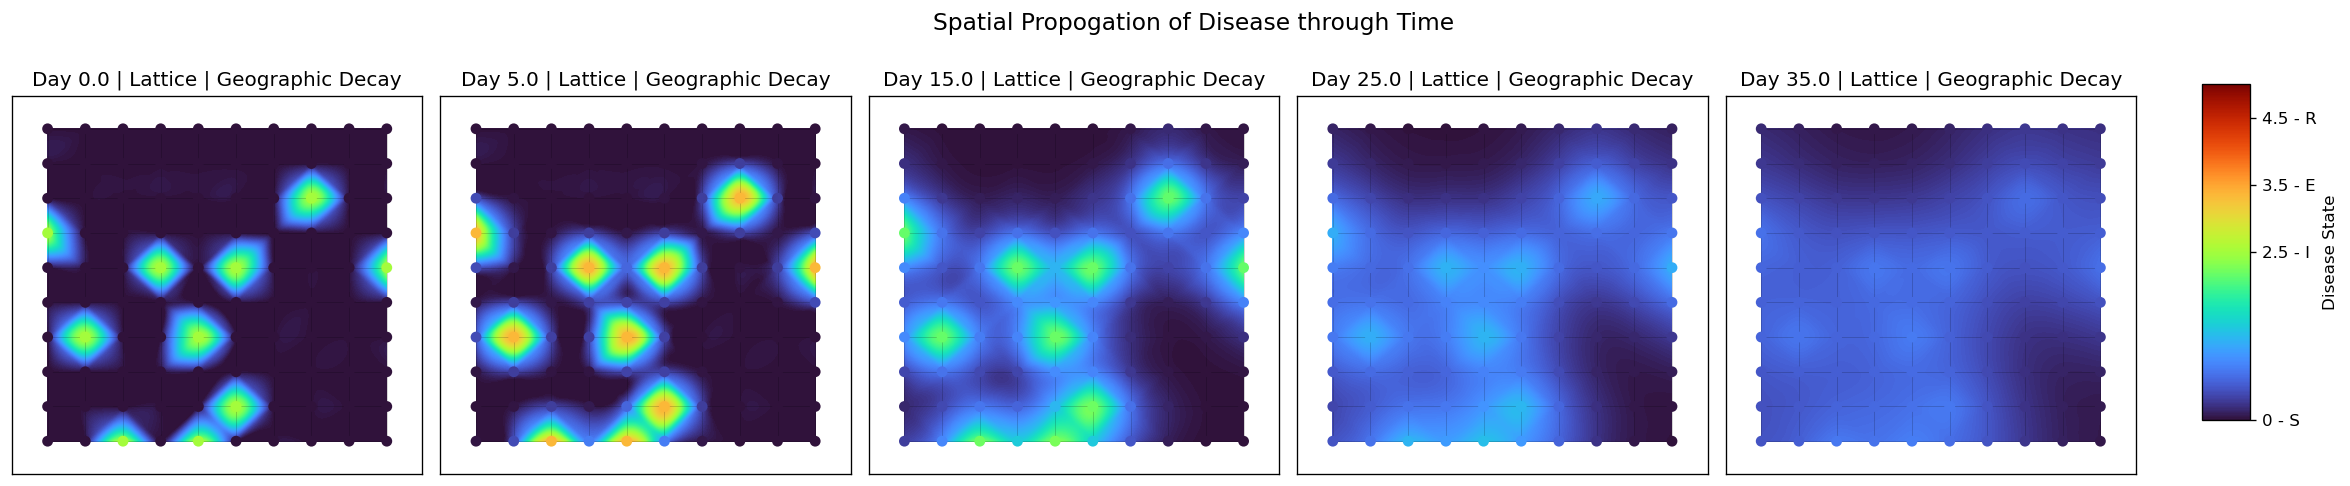

In [320]:
spread_visualization(lattice, pos(lattice, 'Lattice'), geo_solution_lattice_soph, 'turbo', 'Lattice | Geographic Decay', (0, 2.5, 3.5, 4.5), [0, 5, 15, 25, 35])

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/1169500941.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 2400x480 with 6 Axes>,
 array([<Axes: title={'center': 'Day 0.0 | Small-World | Geographic Decay'}>,
        <Axes: title={'center': 'Day 5.0 | Small-World | Geographic Decay'}>,
        <Axes: title={'center': 'Day 15.0 | Small-World | Geographic Decay'}>,
        <Axes: title={'center': 'Day 25.0 | Small-World | Geographic Decay'}>,
        <Axes: title={'center': 'Day 35.0 | Small-World | Geographic Decay'}>],
       dtype=object))

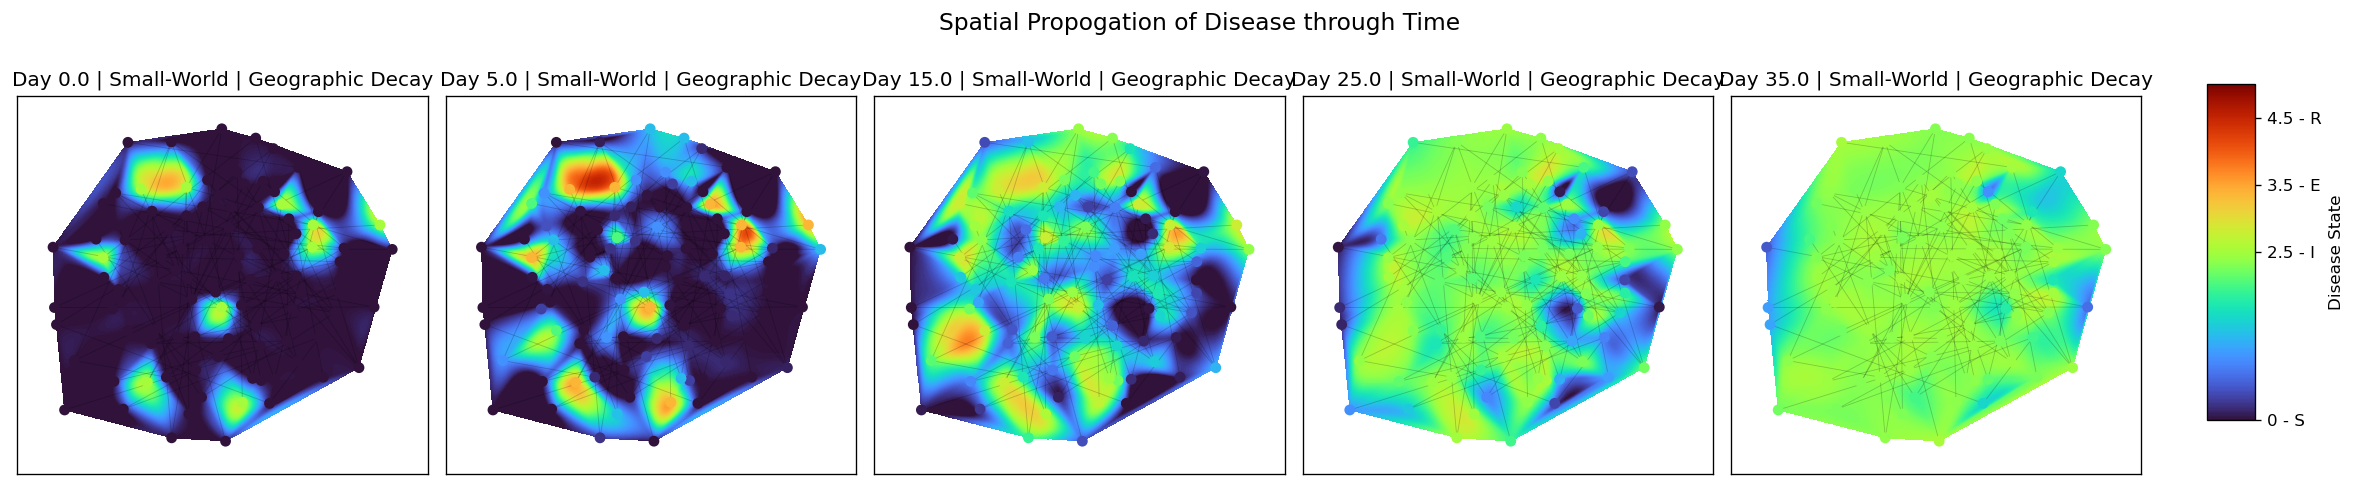

In [321]:
spread_visualization(small_world, nx.kamada_kawai_layout(scale_free), geo_solution_sw_soph, 'turbo', 'Small-World | Geographic Decay', (0, 2.5, 3.5, 4.5), [0, 5, 15, 25, 35])

/var/folders/w5/vt_l3mt93lv1zlltz4mr8jgc0000gn/T/ipykernel_2655/1169500941.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


(<Figure size 2400x480 with 6 Axes>,
 array([<Axes: title={'center': 'Day 0.0 | Scale-Free | Geographic Decay'}>,
        <Axes: title={'center': 'Day 5.0 | Scale-Free | Geographic Decay'}>,
        <Axes: title={'center': 'Day 15.0 | Scale-Free | Geographic Decay'}>,
        <Axes: title={'center': 'Day 25.0 | Scale-Free | Geographic Decay'}>,
        <Axes: title={'center': 'Day 35.0 | Scale-Free | Geographic Decay'}>],
       dtype=object))

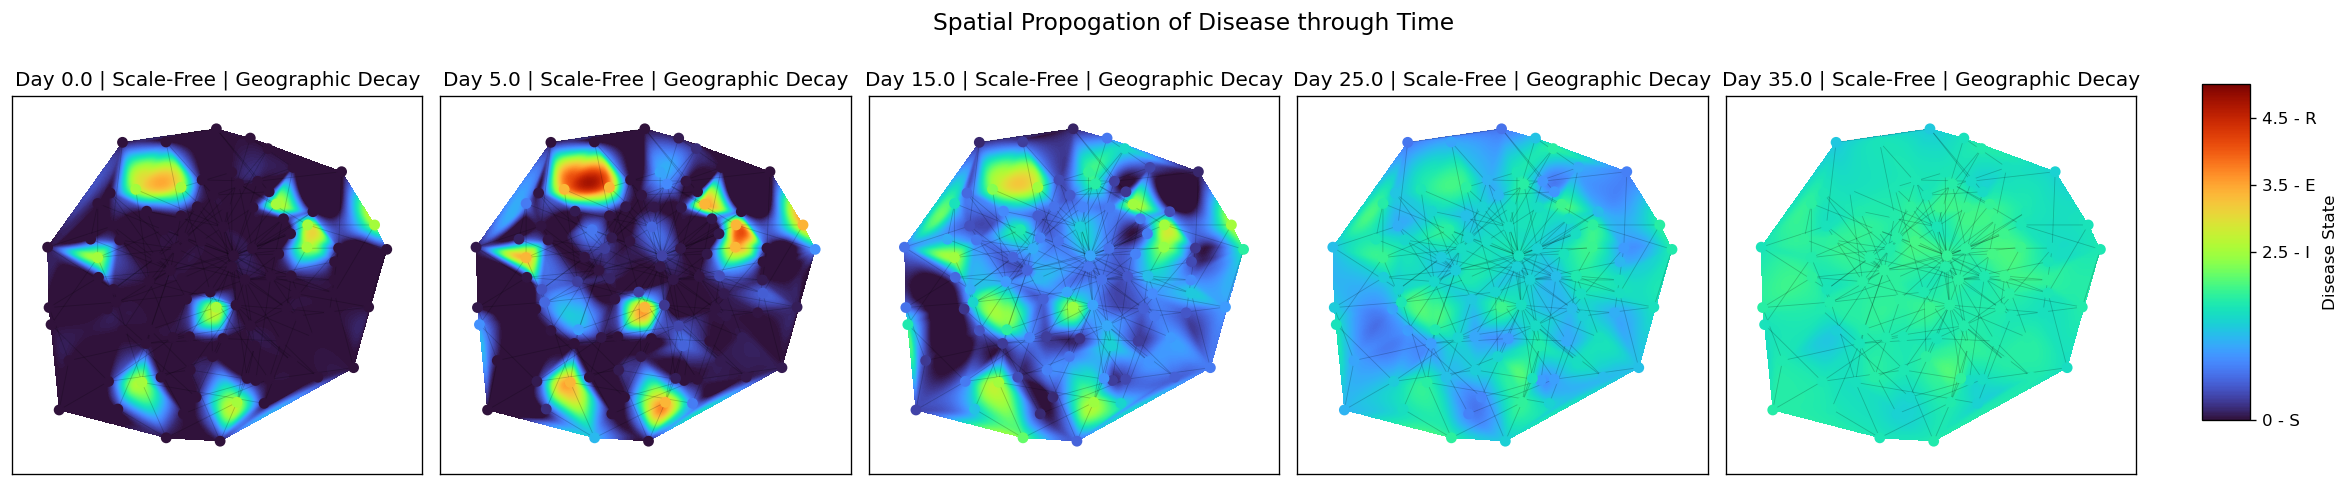

In [322]:
spread_visualization(scale_free, nx.kamada_kawai_layout(scale_free), geo_solution_sf_soph, 'turbo', 'Scale-Free | Geographic Decay', (0, 2.5, 3.5, 4.5), [0, 5, 15, 25, 35])

In [330]:
print(f"With geographical decay, the lattice reaches an equilibrium of {np.sum(geo_solution_lattice_soph[:, 0::4], axis=1)[-1]} expected nodes susceptible")

With geographical decay, the lattice reaches an equilibrium of 95.8932887610129 expected nodes susceptible


#### ***Contour Plot Sophisticated Geographical Model Analysis***:
---

As before when introducing $\delta$, causing a cyclical disease propogation - the fundamental flaw in the contour plot set up is that it is not meant to handle this manner of disease propogation as the interpolation set up causes a mix between high and low values and thus blending into what appears as an "infected" state. This time after introducing geographical components to the model, we can see that in models (specifically the scale-free and lattice models) where the exponential decay of infection pressure due to far distance plays a significant role the entire contour is scaled significantly lower showing an 'average' state of all nodes as more susceptible than not which aligns with the plots of the solutions to the system of differential equations!

Instead of a 'flaw' we can view the fact that the interpolation gives an average state of all nodes combined. Previously in only introducing the new susceptibility rate parameter $\delta$, the equilibrium blend of an "infected" state reflects the concept that the nodes will cycle through infections while in the more sophisticated model including geographic decay the "average state" of susceptibility implies a large amount of nodes are not being infected. This again aligns with the plots which show equilibrium states with a high number of nodes never getting infected, especially the lattice network showing 95 expected susceptible nodes.

## 3 ~ Extending Knowledge of Network Modeling to Other Systems

Networks are also useful for modeling gene regulatory systems. For the final part of the project, you will create a basic Boolean gene regulatory network model. Each node represents a gene that can be either active or inactive (i.e., a binary ON or OFF), and edges represent interaction pathways between genes. Only the nodes connected to a node contribute to the activity of the gene.

### (a) As in the previous sections, create three different gene networks using NetworkX, each with 200 nodes. You may use the same networks from the previous part if you wish. Randomly assign half of the genes to be initially active and the rest to be inactive. In each time step, activate a gene if more than half of its neighboring genes are active.

We will be using other cool networks!

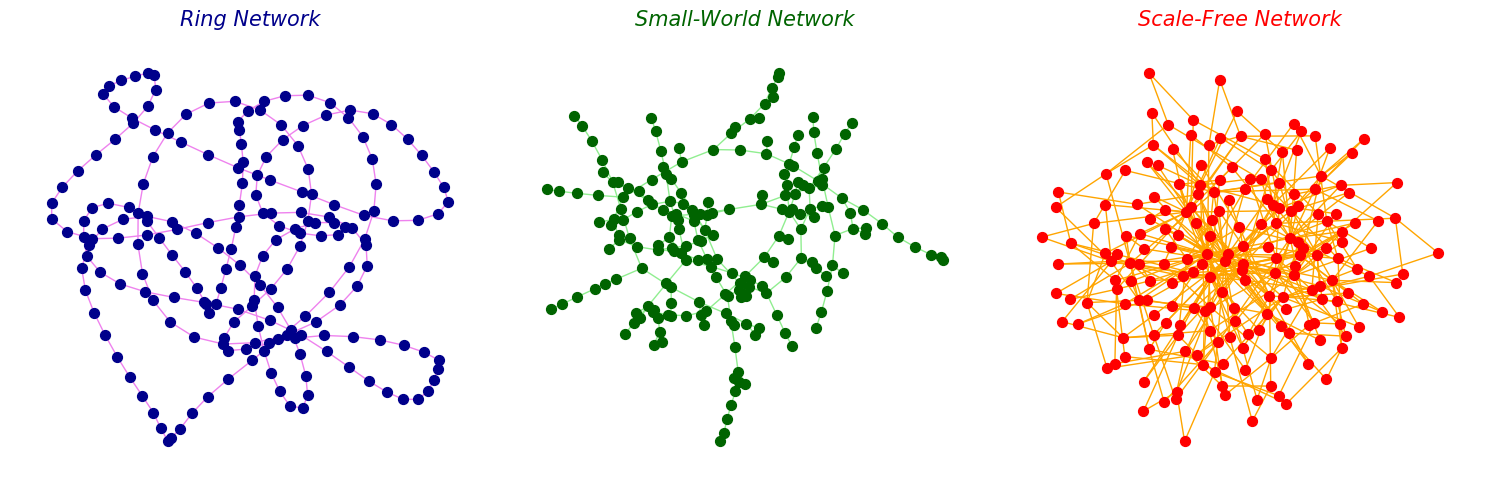

In [389]:
gene_networks = create_networks(200)

gene_network_names = ["Small World", "Ring", "Scale-Free"]
gene_networks_list = [gene_networks[name] for name in gene_network_names]

gene_sw = gene_networks["Small World"]
gene_ring = gene_networks["Ring"]
gene_scale_free = gene_networks["Scale-Free"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(gene_ring, ax=ax[0], node_size=50, node_color='darkblue', edge_color='violet')
ax[0].set_title('Ring Network', fontsize=15, color='darkblue', style='italic')

nx.draw(gene_sw, ax=ax[1], node_size=50, node_color='darkgreen', edge_color='lightgreen')
ax[1].set_title('Small-World Network', fontsize=15, color='darkgreen', style='italic')

nx.draw(gene_scale_free, ax=ax[2], node_size=50, node_color='red', edge_color='orange')
ax[2].set_title('Scale-Free Network', fontsize=15, color='red', style='italic')

fig.tight_layout()

##### Setting Gene States

In [ ]:
# SETTING GENE STATES

for network in gene_networks_list:
    nodes = list(network.nodes())
    active_count = len(nodes) // 2
    active_indices = np.random.choice(len(nodes), active_count, replace=False)

    for node in nodes:
        network.nodes[node]['state'] = 'OFF'

    for idx in active_indices:
        network.nodes[nodes[idx]]['state'] = 'ON'

For the gene activation based on neighbor activation, we will implement it in part b!

### (b) For each network, plot the number of active genes over time, and record the final number of active genes and the time step at which the system stabilizes (if it does). Change the fraction of genes starting as active. Does this change the final number of active genes? You may find it valuable in this discussion to plot the steady-state number of active genes versus the fraction of genes that were initially active.

##### Gene Simulation

In [ ]:
def simulate_gene_network(network, num_steps=100):
    nodes = list(network.nodes())
    active_count = []

    current_active = sum(1 for node in nodes if network.nodes[node]['state'] == 'ON')
    active_count.append(current_active)

    step_stabilized = -1
    for step in range(1, num_steps + 1):
        new_states = {}
        for node in nodes:
            neighbors = list(network.neighbors(node))

            active_neighbors = sum(1 for neighbor in neighbors if network.nodes[neighbor]['state'] == 'ON')

            if active_neighbors > len(neighbors) / 2:
                new_states[node] = 'ON'
            else:
                new_states[node] = 'OFF'

        if all(new_states[node] == network.nodes[node]['state'] for node in nodes):
            step_stabilized = step
            active_count.append(current_active)
            break

        for node in nodes:
            network.nodes[node]['state'] = new_states[node]

        current_active = sum(1 for node in nodes if network.nodes[node]['state'] == 'ON')
        active_count.append(current_active)

    return active_count, step_stabilized

Small World: Final active genes = 47, Stabilized at step -1
Ring: Final active genes = 0, Stabilized at step 10
Scale-Free: Final active genes = 0, Stabilized at step 8


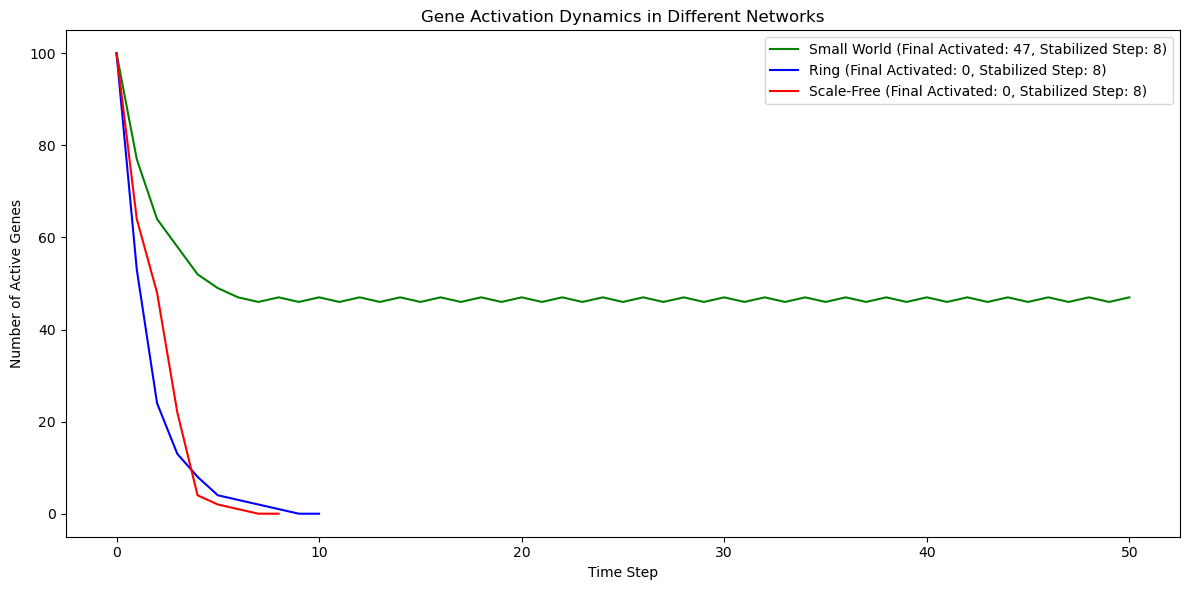

In [457]:
num_steps = 50
results = {}
colors = {"Scale-Free": 'red', "Small World": 'green', "Ring": 'blue'}

for i in range(len(gene_network_names)):
    name = gene_network_names[i]
    network = gene_networks_list[i]
    sim_network = network.copy() # COPYING INITIAL STATES
    for node in sim_network.nodes():
        sim_network.nodes[node]['state'] = network.nodes[node]['state']

    active_count, step_stabilized = simulate_gene_network(sim_network, num_steps)

    results[name] = {'active_count': active_count, 'final_active': active_count[-1], 'step_stabilized': step_stabilized}

    print(f"{name}: Final active genes = {active_count[-1]}, Stabilized at step {step_stabilized}")

fig, ax = plt.subplots(figsize=(12, 6))

for name, result in results.items():
    ax.plot(range(len(result['active_count'])), result['active_count'],
            label=f"{name} (Final Activated: {result['final_active']}, Stabilized Step: {step_stabilized if step_stabilized > 0 else 'Not yet'})",
              color=colors[name])

ax.set_xlabel('Time Step')
ax.set_ylabel('Number of Active Genes')
ax.set_title('Gene Activation Dynamics in Different Networks')
ax.legend()
fig.tight_layout()

#### **Gene Activation Analysis**:
---

Results:
Small World: Final active genes = 47, Stabilized at step -1
Ring: Final active genes = 0, Stabilized at step 10
Scale-Free: Final active genes = 0, Stabilized at step 8

As we can see, the given fractional initiial population of activated genes is not enough for the ring and scale-free nodes which can be due to them having topologies that have either too little or too many degrees and connections. For example, if the ring has only one node neighbor that is not activated, it deactivates.

##### Trying Different Fractions
Different fractions may have significantly different results, we can make a function that takes an input of a list of fractions and then simulates the gene activation dynamics in accordance with the input fractions. We will simulate from 0% to 100% with 10% increments.

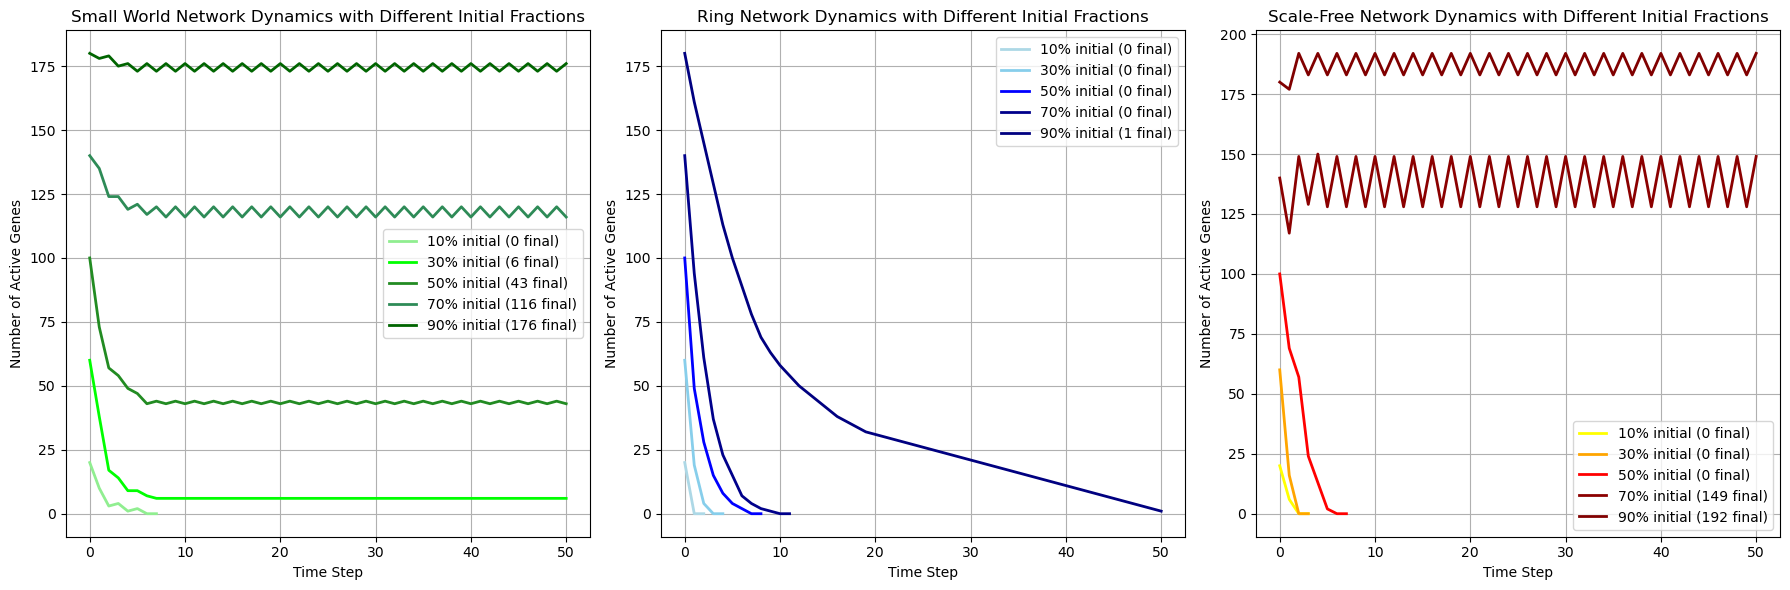

In [ ]:
initial_fractions = [0.1, 0.3, 0.5, 0.7, 0.9]
fraction_colors_1 = ['lightblue', 'skyblue', 'blue', 'darkblue', 'navy']
fraction_colors_2 = ['lightgreen', 'lime', 'forestgreen', 'seagreen', 'darkgreen']
fraction_colors_3 = ['yellow', 'orange', 'red', 'darkred', 'maroon']
fraction_color_network = {'Ring': fraction_colors_1, 'Small World': fraction_colors_2, 'Scale-Free': fraction_colors_3}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
network_results = {}

for i, name in enumerate(gene_network_names):
    network = gene_networks_list[i]
    network_results[name] = []
    ax = axes[i]

    for f_idx, fraction in enumerate(initial_fractions):
        sim_network = network.copy()
        nodes = list(sim_network.nodes())
        num_nodes = len(nodes)

        for node in nodes:
            sim_network.nodes[node]['state'] = 'OFF'

        num_active = int(fraction * num_nodes)
        active_indices = np.random.choice(num_nodes, num_active, replace=False)
        for idx in active_indices:
            sim_network.nodes[nodes[idx]]['state'] = 'ON'

        active_count, step_stabilized = simulate_gene_network(sim_network, num_steps)

        network_results[name].append({
            'fraction': fraction,
            'active_count': active_count,
            'final_active': active_count[-1],
            'step_stabilized': step_stabilized
        })

        ax.plot(range(len(active_count)), active_count,
                color=fraction_color_network[name][f_idx],
                linewidth=2,
                label=f"{int(fraction*100)}% initial ({active_count[-1]} final)")

    ax.set_xlabel('Time Step')
    ax.set_ylabel('Number of Active Genes')
    ax.set_title(f'{name} Network Dynamics with Different Initial Fractions')
    ax.legend()
    ax.grid(True)

fig.tight_layout()

#### ***Gene Activation Dynamics Analysis***:
---

As expected, as we increase the number of initial activated genes it takes far longer for the entire network to be deactivated. Interestingly there seem to be two states, either a progressive decrease in activated genes or an oscillation (what seems to be an equilibrium) of genes repeatedly turning on and off for eternity.

In [ ]:
def test_initial_fractions(network, fractions, num_steps=50, trials=5):
    results = []

    for fraction in fractions:
        trial_results = []
        for _ in range(trials):
            sim_network = network.copy()
            nodes = list(sim_network.nodes())
            num_nodes = len(nodes)

            num_active = int(fraction * num_nodes)
            active_indices = np.random.choice(num_nodes, num_active, replace=False)

            for node in nodes:
                sim_network.nodes[node]['state'] = 'OFF'
            for idx in active_indices:
                sim_network.nodes[nodes[idx]]['state'] = 'ON'

            active_count, step_stabilized = simulate_gene_network(sim_network, num_steps)

            trial_results.append({'final_active': active_count[-1], 'step_stabilized': step_stabilized})

        avg_final_active = np.mean([r['final_active'] for r in trial_results])
        avg_step = np.mean([r['step_stabilized'] for r in trial_results if r['step_stabilized'] > 0])

        results.append({
            'fraction': fraction,
            'avg_final_active': avg_final_active,
            'avg_step_stabilized': avg_step if not np.isnan(avg_step) else -1
        })

    return results

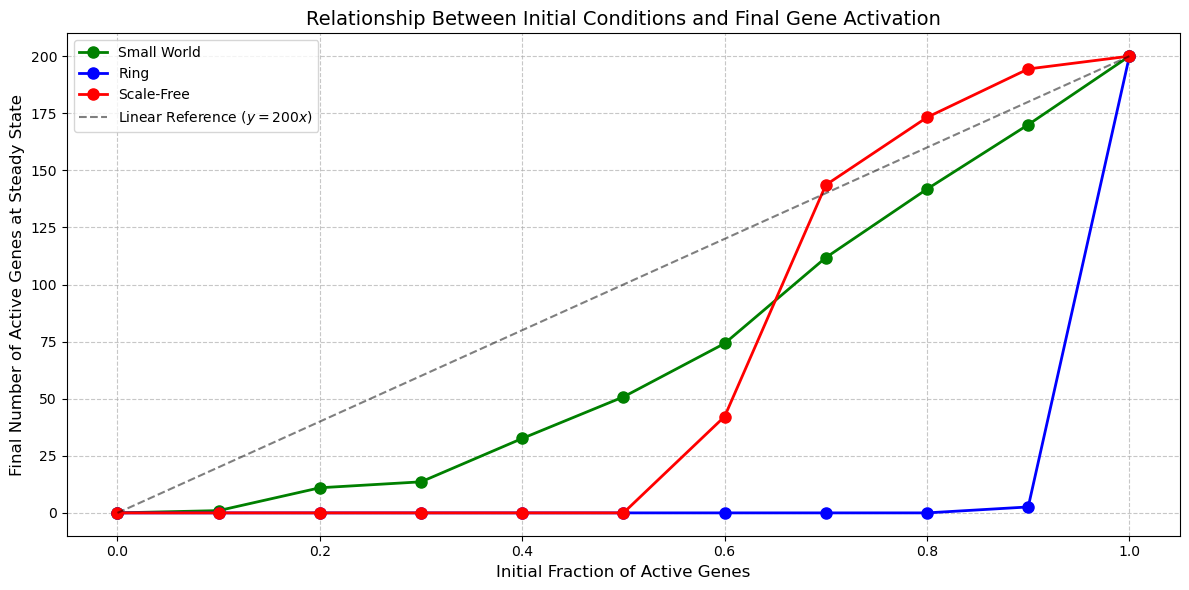

In [438]:
fractions = np.linspace(0, 1, 11)
fraction_results = {}

for i in range(len(gene_network_names)):
    name = gene_network_names[i]
    network = gene_networks_list[i]
    fraction_results[name] = test_initial_fractions(network, fractions)

fig, ax = plt.subplots(figsize=(12, 6))

for name in gene_network_names:
    results = fraction_results[name]
    x = [r['fraction'] for r in results]
    y = [r['avg_final_active'] for r in results]

    ax.plot(x, y, marker='o', label=name, color=colors[name], linewidth=2, markersize=8)

# LINEAR LINE
ax.plot([0, 1], [0, 200], '--', alpha=0.5, label='Linear Reference ($y=200x$)', color='black')

ax.set_xlabel('Initial Fraction of Active Genes', fontsize=12)
ax.set_ylabel('Final Number of Active Genes at Steady State', fontsize=12)
ax.set_title('Relationship Between Initial Conditions and Final Gene Activation', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()
fig.tight_layout()

#### ***Initial Conditions v. Final Gene Activation Analysis***:
---

The following plot is the same conclusion but visualized differently, we can see the progressive increase in activated genes after simulation which seems to linearly depend on the initial fraction of active genes. The ring case is an outlier as it only reaches 200 active genes when the fraction is 1.0. (100% of initial activated genes). 

### (c) Compare the three networks based on their plots and the recorded metrics. How do their behaviors differ, and what might this suggest about the structure of gene regulatory networks in nature?

Small World: Linear Regression Slope = 1.05
Largest change occurs near initial fraction: 0.65

Ring: Linear Regression Slope = 0.46
Largest change occurs near initial fraction: 0.95

Scale-Free: Linear Regression Slope = 1.19
Largest change occurs near initial fraction: 0.65



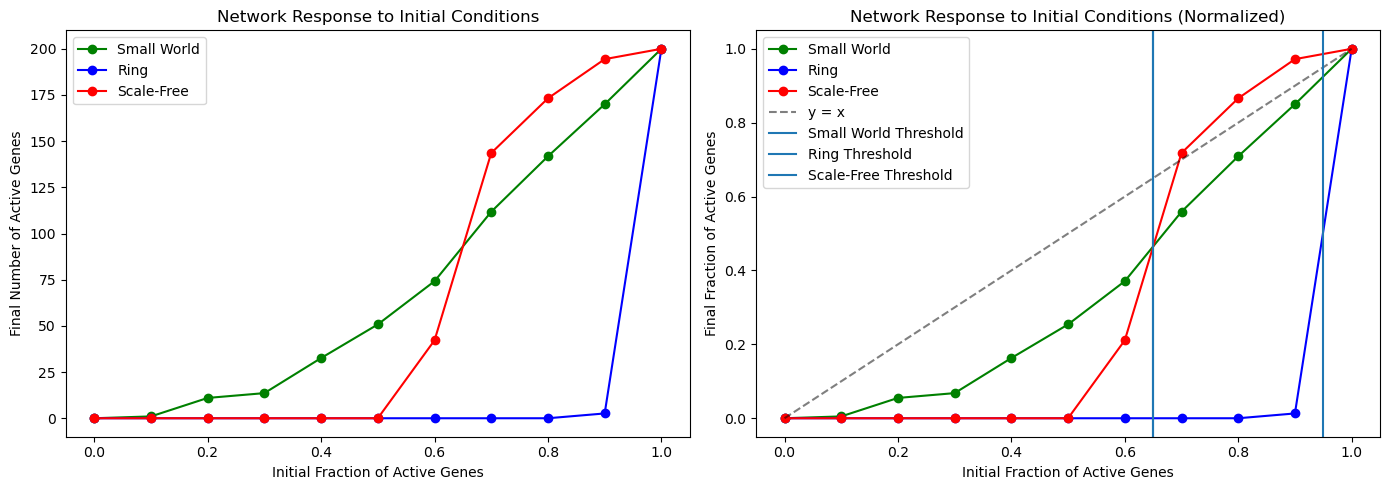

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax = axes[0]
for name in gene_network_names:
    results = fraction_results[name]
    x = [r['fraction'] for r in results]
    y = [r['avg_final_active'] for r in results]
    ax.plot(x, y, marker='o', label=name, color=colors[name])

ax.set_xlabel('Initial Fraction of Active Genes')
ax.set_ylabel('Final Number of Active Genes')
ax.set_title('Network Response to Initial Conditions')
ax.legend()

# WE CAN MAKE THE SAME PLOT BUT MAKE IT FRACTION VS FRACTION
ax = axes[1]
for name in gene_network_names:
    results = fraction_results[name]
    x = [r['fraction'] for r in results]
    y = [r['avg_final_active']/200 for r in results]
    ax.plot(x, y, '-o', label=name, color=colors[name])

ax.plot([0, 1], [0, 1], '--', alpha=0.5, label='y = x', color='black')

ax.set_xlabel('Initial Fraction of Active Genes')
ax.set_ylabel('Final Fraction of Active Genes')
ax.set_title('Network Response to Initial Conditions (Normalized)')
ax.legend()

fig.tight_layout()

for name in gene_network_names:
    results = fraction_results[name]
    x = np.array([r['fraction'] for r in results])
    y = np.array([r['avg_final_active']/200 for r in results])

    linear_model = sc.stats.linregress(x, y)
    slope = linear_model.slope

    print(f"{name}: Linear Regression Slope = {slope:.2f}")

    ### FINDING THRESHOLD
    if len(y) > 1:
            differences = np.diff(y)
            max_change_idx = np.argmax(abs(differences))
            threshold = x[max_change_idx:max_change_idx+2].mean()
            print(f"Largest change occurs near initial fraction: {threshold:.2f}\n")
            ax.axvline(x=threshold, label=f'{name} Threshold')

    ax.legend()

#### ***Initial Conditions v. Final Gene Activation Analysis***:
---

Results:
Small World: Linear Regression Slope = 1.05
Largest change occurs near initial fraction: 0.65

Ring: Linear Regression Slope = 0.46
Largest change occurs near initial fraction: 0.95

Scale-Free: Linear Regression Slope = 1.19
Largest change occurs near initial fraction: 0.65

A lower fraction and more linear slope (closer to y = x) is a sign of a very stable gene structure that is able to retain itself regardless of what initial fraction is already active. It inherently implies stability in how the gene activations occur with each time step.

From reference (5), Yinghao Wu, the protein feedback loop mechanisms are a good way to explain the structure of gene regulatory networks in nature because they provide the dynamic capabilities necessary for complex biological functions that static network topologies alone cannot achieve. There must be a mix of oscillatory and negative feedback behaviors that allow these complex biological functions to work.